# Porto Seguro

## 목적
Porto Seguro는 브라질의 자동차 보험 회사로,    
보험 청구를 누가 사용 할 것인지를 예측하는 것이 목표입니다.  

## WorkFlow
커널은 다음과 같은 형태로 진행됩니다.  
1. 데이터 셋 확인
2. 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
3. 특성 공학(Feature Engineering)

## Reference
[Data Preparation & Exploration](https://www.kaggle.com/bertcarremans/data-preparation-exploration)

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100) # 데이터의 변수를 100개까지 표현

import warnings
warnings.filterwarnings('ignore')

In [52]:
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 그래프 한글 표시 깨짐 방지
mpl.rc('axes', unicode_minus = False) # 그래프 minus 표시 깨짐 방지

## 1. 데이터 셋 확인

### 데이터 설명
설명 변수명 : ps_ (ind/red/car/calc)_ 숫자 _(bin/cat)  
반응 변수명 : target  

1. 변수들은 각 ind, reg, car, calc으로 그룹화 돼 있습니다.  
2. bin : binary, cat : category 변수입니다.  
3. bin과 cat이 붙지 않는 변수들은 연속형, 또는 순서형 변수 입니다.  
4. -1로 표기된 값은 결측치 입니다.  
5. target은 청구를 한다/안 한다 의 2가지의 값으로 구성 돼 있습니다.

In [53]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [54]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [55]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,7,1,-1,0,-1,1,1,1,2,1,65,1,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,4,1,-1,0,0,11,1,1,0,1,103,1,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,11,1,-1,0,-1,14,1,1,2,1,29,3,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,-1.000000,7,1,-1,0,-1,1,1,1,2,1,40,2,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1


In [56]:
(train.shape, test.shape)

((595212, 59), (892816, 58))

train의 `target`을 제외하면 칼럼 개수는 동일합니다.  

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

`float`으로 표시된 변수들은 연속형 변수이며,  
결측치는 없어보이지만, 데이터 안에 -1로 코딩 돼 있습니다.  

In [59]:
train['target'].unique()

array([0, 1], dtype=int64)

In [60]:
train['target'].describe().to_frame().apply(lambda x: x[1]) * 100

target    3.644752
dtype: float64

In [61]:
train['target'].mean() * 100

3.6447517859182947

`target`은 0과 1로 구성 돼 있으므로,  
평균 값을 구하면 0과 1의 구성 비를 알 수 있다.  

여기서 0의 값이 약 96%에 임박하며  
값들이 상당히 불균형을 이루고 있다.  

### Meta Data
Meta Data를 사용하는 목적은 
변수들의 역할, 데이터 타입 등을 적어둬  
필요한 변수들을 사용하거나 모델에 적합할 때  
데이터의 형태를 확인 할 때 등  
손쉽게 변수를 추출 하거나 관리하기 용히하게 만들기 위함입니다.  

Meta Data는 4가지로 구성 됩니다. 

__role__ : 변수 역할, id/target/input 으로 포현합니다.  
__level__ : 변수의 형태, nominal/interval/ordinal/binary 로 구성 돼 있습니다.  
__keep__ : 변수의 사용 여부, True/False 로 구성 돼 있습니다.  
__dtype__ : 변수의 타입, int/float/str 로 구성 돼 있습니다.   

In [62]:
data = []

for f in train.columns:
    # 변수 역할
    if f == 'target':
        role = 'target'
    elif f == 'id' :
        role = 'id'
    else:
        role = 'input'
        
    # 변수 형태
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64': # int랑 비교하면 False 조건이여서 np.int64로 수정
        level = 'ordinal'
    
    # 변수 사용 여부
    keep = True
    if f == 'id':
        keep = False
    
    # 변수 타입
    dtype = train[f].dtype
    
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype    
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace = True)

In [63]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [64]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

범주형 변수면서 사용하는 변수 이름 추출하기

In [65]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].count()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


각 변수의 역할, 형태 별로 몇 개가 있는지 나타내기

### 분포 확인

In [66]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


__reg__ : ps_reg_03 결측치 존재  
__car__ : ps_car_12, ps_car_14 결측치 존재  
__calc__ : 결측치 없음  

대부분 같은 그룹으로 묶였지만, 최소값부터 최대값 까지의 범위가  
서로 다른 것을 확인 할 수 있다.  
이는 정규화를 통해 서로의 범위를 맞춰 줄 필요가 보인다.  

In [67]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


__reg__ : 결측치 없음  
__car__ : ps_car_11 결측치 존재  
__calc__ : 결측치 없음  

In [68]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__reg__ : 결측치 없음   
__car__ : 결측치 없음    
__calc__ : 결측치 없음  
__target__ : 결측치 없음, 약 3.64% 가 0의 값을 갖고 있음


값이 0으로 편중 돼 있어  
평균이 0.01보다 변수들이 존재함

### 불균형 데이터 다루기
`target`의 라벨이 약 96%가 0이고  
약 4%가 1로 구성 돼 있습니다.  

이는 데이터가 심각한 불균형을 이루고 있다고 말 할 수 있습니다.   
이를 해결하는 방법은 여러개가 있는데  
대표적인 것은  
1. oversampling : 적은 범주의 값을 많이 뽑는 방법  
2. undersampling : 많은 범주의 값을 적게 뽑는 방법  

이 커널에서 undersampling을 사용하겠습니다.  

In [69]:
desired_apriori = 0.1

idx_0 = train[train['target'] == 0].index
idx_1 = train[train['target'] == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

print(nb_0)
print(nb_1)

573518
21694


위에서 살펴본 바와 같이  
`target` 1의 값이 현저히 적습니다.  

In [70]:
undersampling_rate = ((1 - desired_apriori) * nb_1)/(nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)

print('undersampling 후 target 1의 비율 : {}'.format(undersampling_rate * 100))
print('undersampling 후 target 0의 개수 : {}'.format(undersampled_nb_0))

undersampling 후 target 1의 비율 : 34.04356968743789
undersampling 후 target 0의 개수 : 195246


In [71]:
undersampled_idx = shuffle(idx_0, random_state = 2020,
                           n_samples = undersampled_nb_0)
print(undersampled_idx)
print(len(idx_1))

Int64Index([102906, 296597, 108619, 249866, 413174, 221213, 274817,  14684,
             50357, 388991,
            ...
            309171, 336729, 119916, 168950,  40133, 116861, 379100, 452786,
            542419, 520226],
           dtype='int64', length=195246)
21694


In [72]:
idx_list = list(undersampled_idx) + list(idx_1)

In [73]:
train = train.loc[idx_list].reset_index(drop = True)
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,257631,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.7,0.3,0.482183,10,1,-1,0,0,7,1,1,0,1,92,3,0.374166,0.644012,0.392683,2.645751,0.4,0.4,0.5,2,2,8,2,10,2,7,5,2,5,8,0,1,1,0,0,0
1,741036,0,3,1,6,0,0,0,1,0,0,0,0,0,0,0,4,1,0,0,0.5,0.3,0.782624,11,0,1,9,1,15,1,0,2,1,41,2,0.547723,1.685702,0.428952,3.605551,0.1,0.4,0.3,2,1,10,3,12,2,6,7,0,5,3,0,0,0,0,0,0
2,271857,0,5,2,2,0,0,0,0,1,0,0,0,0,0,0,9,1,0,0,0.5,0.6,1.034408,11,1,1,0,1,6,1,0,2,1,33,3,0.387298,0.919385,0.328634,3.741657,0.2,0.6,0.8,2,3,10,4,10,2,9,0,0,2,4,0,0,1,0,0,0
3,624291,0,5,2,2,0,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.6,0.3,0.997497,11,0,-1,0,-1,0,1,1,2,1,86,3,0.447214,0.965050,0.411704,3.162278,0.9,0.7,0.8,2,1,8,1,8,6,6,4,5,2,6,0,1,0,0,0,1
4,1032757,0,2,1,5,1,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.6,0.5,-1.000000,6,1,-1,2,1,11,1,1,0,1,14,0,0.374166,0.805816,0.428602,3.316625,0.4,0.5,0.8,3,2,7,4,8,2,10,6,2,3,6,0,1,0,0,0,0


### 결측치 개수 파악

In [144]:
def missing_values(df):
    vars_with_missing = []
    missings = []
    perc = []
    for f in df.columns:
        mis_val = df[df[f] == -1][f].count()
        if mis_val > 0:
            vars_with_missing.append(f)
            missings.append(mis_val)
            perc.append(((mis_val / df.shape[0]) * 100).round(2))
            
    mis_val_table = pd.DataFrame({'Variable' : vars_with_missing,
                                  'Missing Values' :missings,
                                  '% of Total Values' : perc})
    print('결측치 column의 개수 : {}개'.format(mis_val_table.shape[0]))
    print(mis_val_table)
    
    return vars_with_missing

In [145]:
vars_with_missing = missing_values(train)

결측치 column의 개수 : 11개
         Variable  Missing Values  % of Total Values
0   ps_ind_02_cat              99                0.0
1   ps_ind_04_cat              48                0.0
2   ps_ind_05_cat            2325                1.1
3       ps_reg_03           38839               17.9
4   ps_car_01_cat              61                0.0
5   ps_car_02_cat               2                0.0
6   ps_car_07_cat            4520                2.1
7   ps_car_09_cat             214                0.1
8       ps_car_11               3                0.0
9       ps_car_12               1                0.0
10      ps_car_14           15693                7.2


최대 68.53%의 결측치(약 148678개)에서 거의 0에 가까운 결측치(1개)가 존재한다.  

In [85]:
meta.loc[vars_with_missing, ['level']]

,level
varname,
ps_ind_02_cat,nominal
ps_ind_04_cat,nominal
ps_ind_05_cat,nominal
ps_reg_03,interval
ps_car_01_cat,nominal
ps_car_02_cat,nominal
ps_car_03_cat,nominal
ps_car_05_cat,nominal
ps_car_07_cat,nominal


__nominal__ : 명목형 변수의 경우 최빈값을 이용하여 값을 대체하겠습니다.   
__interval__ : 표현은 `interval`(등간 변수)로 사용했지만, 값들은 연속형 입니다. 이를 평균으로 대체하겠습니다.  
__ordinal__ : 순서형 변수의 경우 최빈값을 이용하여 값을 대체하겠습니다. 

이 중에서 결측치가 많은 두 변수는 제외하겠습니다.  

In [86]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace = True, axis = 1)
meta.loc[vars_to_drop, 'keep'] = False

### 결측치 대체

In [90]:
meta.head()

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64


In [149]:
mean_imp = Imputer(missing_values = -1, strategy = 'mean', axis = 0) # 평균을 이용하여 대체
mode_imp = Imputer(missing_values = -1, strategy = 'most_frequent', axis = 0) # 최빈수를 이용하여 대체

vars_with_missing = [v for v in vars_with_missing if v not in vars_to_drop]
vars_nominal = [v for v in vars_with_missing if meta.loc[v, 'level'] == 'nominal']
vars_ordinal = [v for v in vars_with_missing if meta.loc[v, 'level'] == 'ordinal']
vars_interval = [v for v in vars_with_missing if meta.loc[v, 'level'] == 'interval']

In [150]:
for v in vars_nominal:
    train[v] = mode_imp.fit_transform(train[[v]]).ravel()

In [151]:
for v in vars_ordinal:
    train[v] = mode_imp.fit_transform(train[[v]]).ravel()

In [152]:
for v in vars_interval:
    train[v] = mean_imp.fit_transform(train[[v]]).ravel()

### 범주 개수 파악

In [153]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('변수 {}는 {}개의 unique한 값을 갖고 있습니다.'.format(f, dist_values))

변수 ps_ind_02_cat는 4개의 unique한 값을 갖고 있습니다.
변수 ps_ind_04_cat는 2개의 unique한 값을 갖고 있습니다.
변수 ps_ind_05_cat는 7개의 unique한 값을 갖고 있습니다.
변수 ps_car_01_cat는 12개의 unique한 값을 갖고 있습니다.
변수 ps_car_02_cat는 2개의 unique한 값을 갖고 있습니다.
변수 ps_car_04_cat는 10개의 unique한 값을 갖고 있습니다.
변수 ps_car_06_cat는 18개의 unique한 값을 갖고 있습니다.
변수 ps_car_07_cat는 2개의 unique한 값을 갖고 있습니다.
변수 ps_car_08_cat는 2개의 unique한 값을 갖고 있습니다.
변수 ps_car_09_cat는 5개의 unique한 값을 갖고 있습니다.
변수 ps_car_10_cat는 3개의 unique한 값을 갖고 있습니다.
변수 ps_car_11_cat는 104개의 unique한 값을 갖고 있습니다.


범주의 개수가 적개는 2개에서 많개는 104개 까지 존재합니다.  

다음은 `target` 인코딩 방식입니다.  
이 커널에서는 `Mean Encoding`의 한 방법인  
__Smoothing__ 기법을 사용했습니다.  
참조 내용 : [A Preprocessing Scheme fro High-Cardinality Categorical Attributes in Classfication and Perdiction Problems](http://helios.mm.di.uoa.gr/~rouvas/ssi/sigkdd/sigkdd.vol3.1/barreca.pdf)


In [157]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None, 
                  tst_series = None, 
                  target = None, 
                  min_samples_leaf = 1, 
                  smoothing = 1,
                  noise_level = 0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis = 1)

    averages = temp.groupby(by = trn_series.name)[target.name].agg(["mean", "count"])

    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    prior = target.mean()

    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis = 1, inplace = True)

    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns = {'index': target.name,
                                                 target.name: 'average'}),
        on = trn_series.name,
        how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns = {'index': target.name,
                                                 target.name: 'average'}),
        on = tst_series.name,
        how = 'left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [158]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                                            test["ps_car_11_cat"], 
                                            target = train.target, 
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat','keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis = 1, inplace = True)

## 2. 탐색적 자료 분석

In [159]:
def make_plot(datatype = None, x = None, y = None, percent = True):
    if datatype:
        v = meta[(meta.level == datatype) & (meta.keep)].index
        if datatype  in ['nominal', 'ordinal', 'binary']:
            for f in v:
                if f == 'target':
                    pass
                else:
                    if percent:
                        data = train[[f, 'target']]\
                        .groupby(f, as_index = False).mean()
                    else:
                        data = train.loc[train['target'] == 1,
                                         [f, 'target']]\
                        .groupby(f, as_index = False).count()
                    plt.figure()
                    fig, ax = plt.subplots(figsize = (20, 10))
                    data.sort_values(by = 'target', ascending = False,
                                     inplace = True)
                    sns.barplot(ax = ax, x = f, y = 'target',
                                data = data, order = data[f])
                    plt.ylabel('% target', fontsize = 18)
                    plt.xlabel(f, fontsize = 18)
                    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

        if datatype == 'interval':
            s = train.sample(frac = 0.1)
            sns.lmplot(x = x, y = y, data = s, hue = 'target',
                       palette = 'Set1', scatter_kws = {'alpha' : 0.3})

In [160]:
def make_corr(datatype = None, cor_all = False):
    if datatype and cor_all:
        v = meta[meta.keep].index
    elif datatype:
        v = meta[(meta.level == datatype) & (meta.keep)].index
    
    corr = train[v].corr()
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    f, ax = plt.subplots(figsize = (8, 8))
    sns.heatmap(corr, cmap = cmap, vmax = 1, center = 0, fmt = '.2f',
                square = True, linewidths = 0.5, annot = True, cbar_kws = {'shrink' : 0.75})

### __Nominal__  
`target`이 1인 값들의 비율

<Figure size 432x288 with 0 Axes>

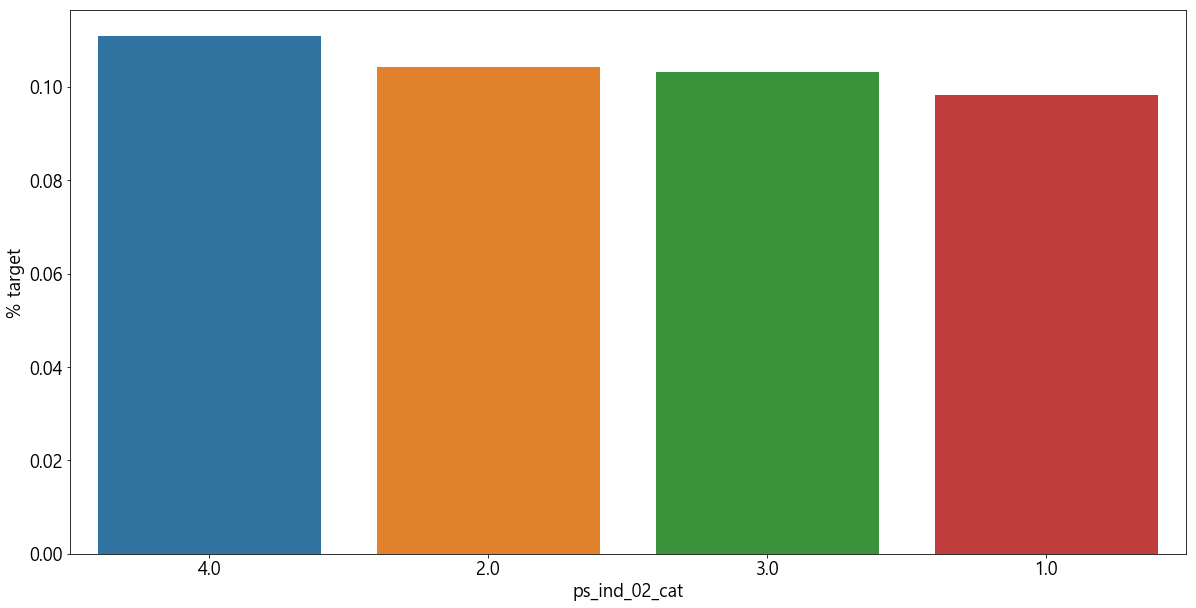

<Figure size 432x288 with 0 Axes>

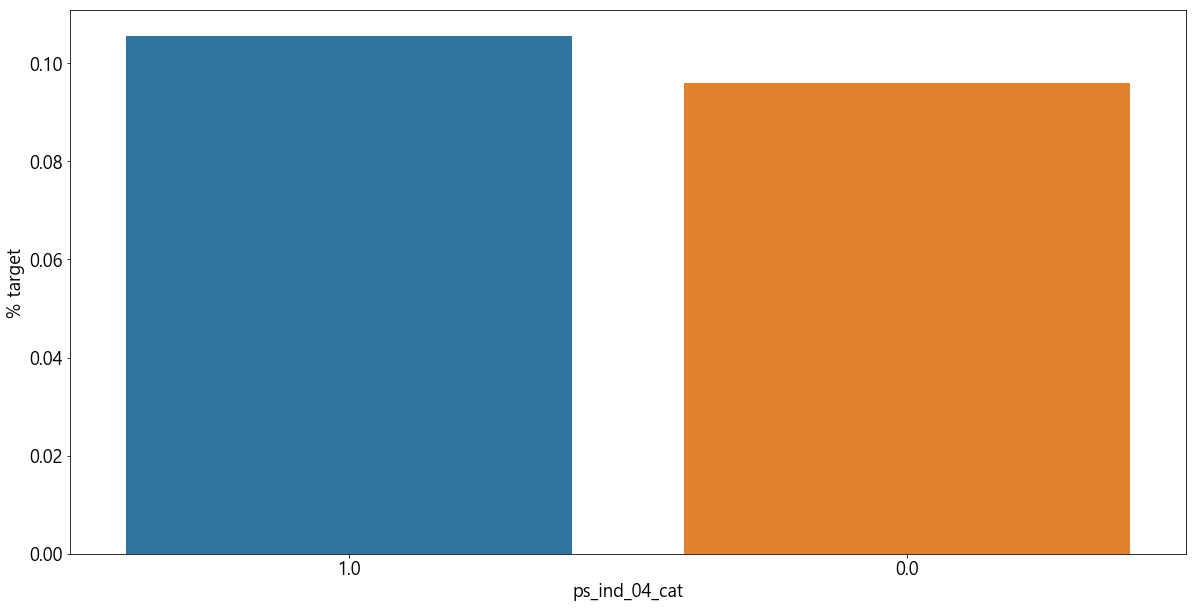

<Figure size 432x288 with 0 Axes>

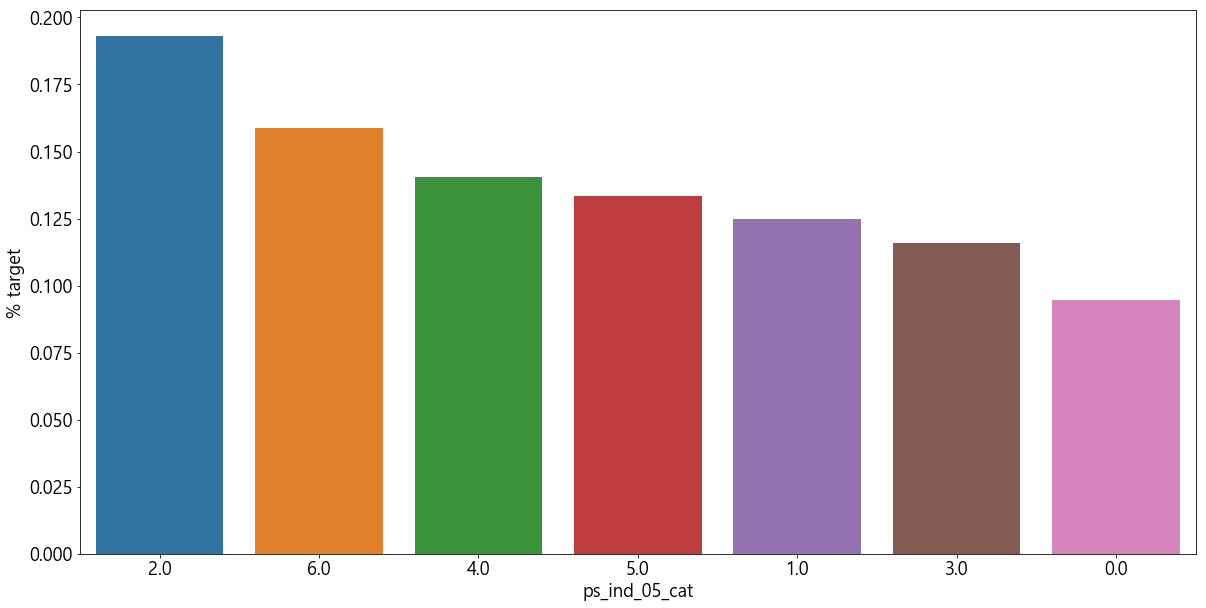

<Figure size 432x288 with 0 Axes>

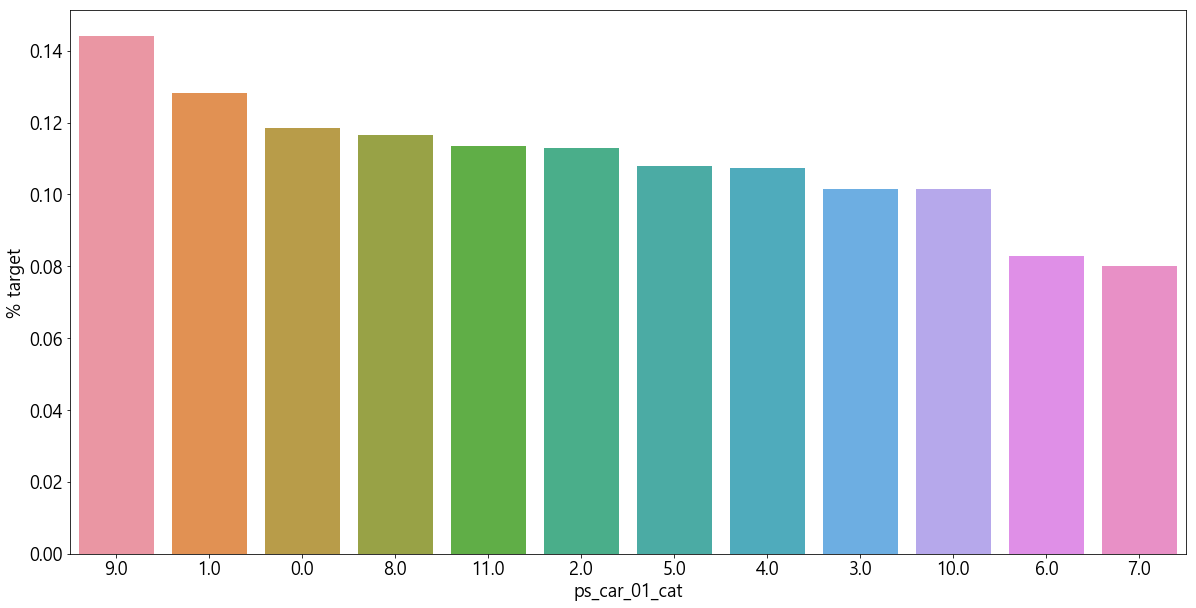

<Figure size 432x288 with 0 Axes>

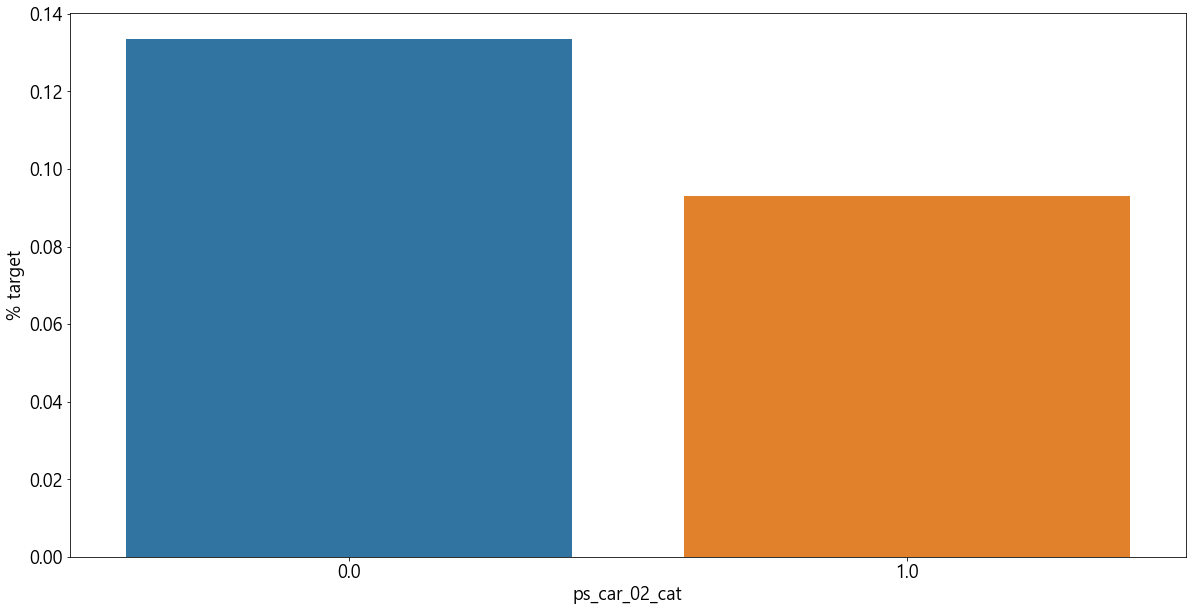

<Figure size 432x288 with 0 Axes>

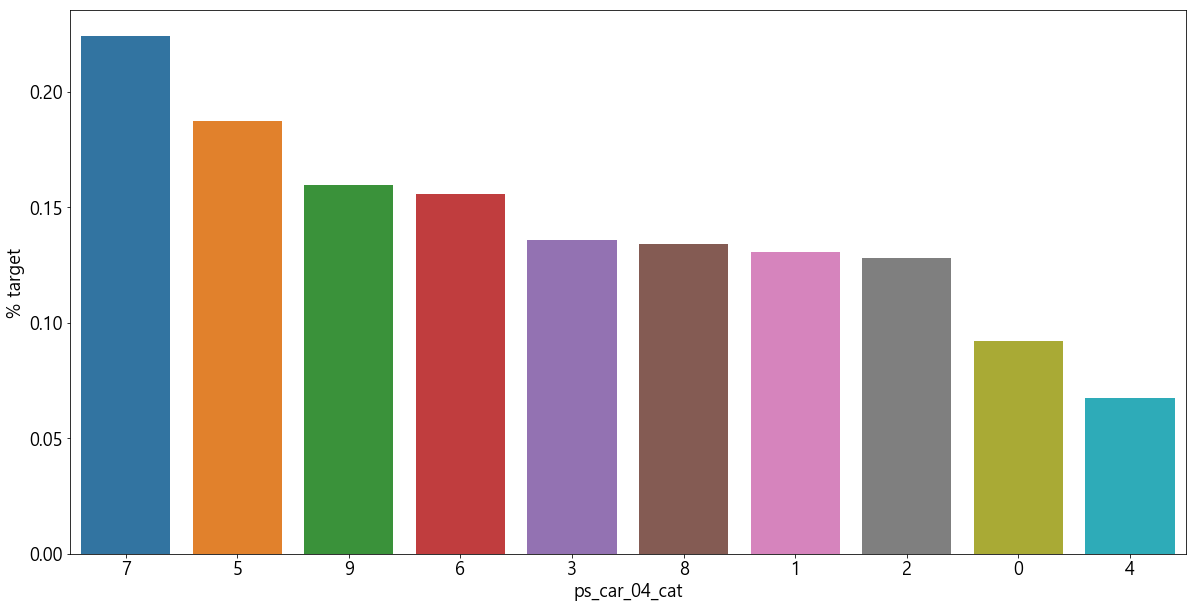

<Figure size 432x288 with 0 Axes>

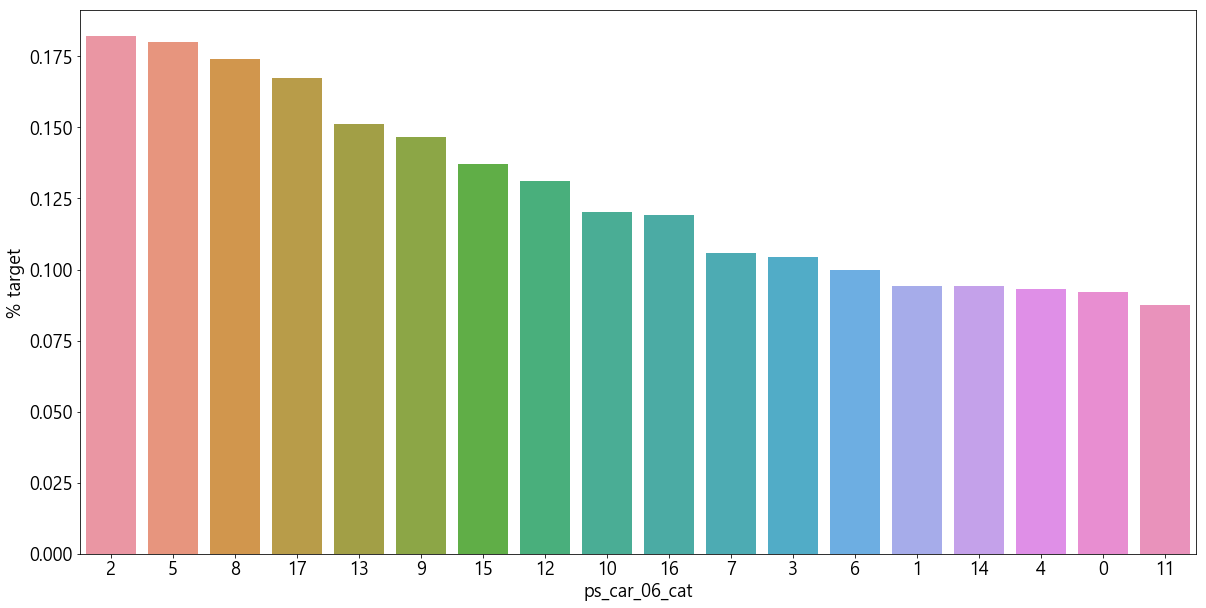

<Figure size 432x288 with 0 Axes>

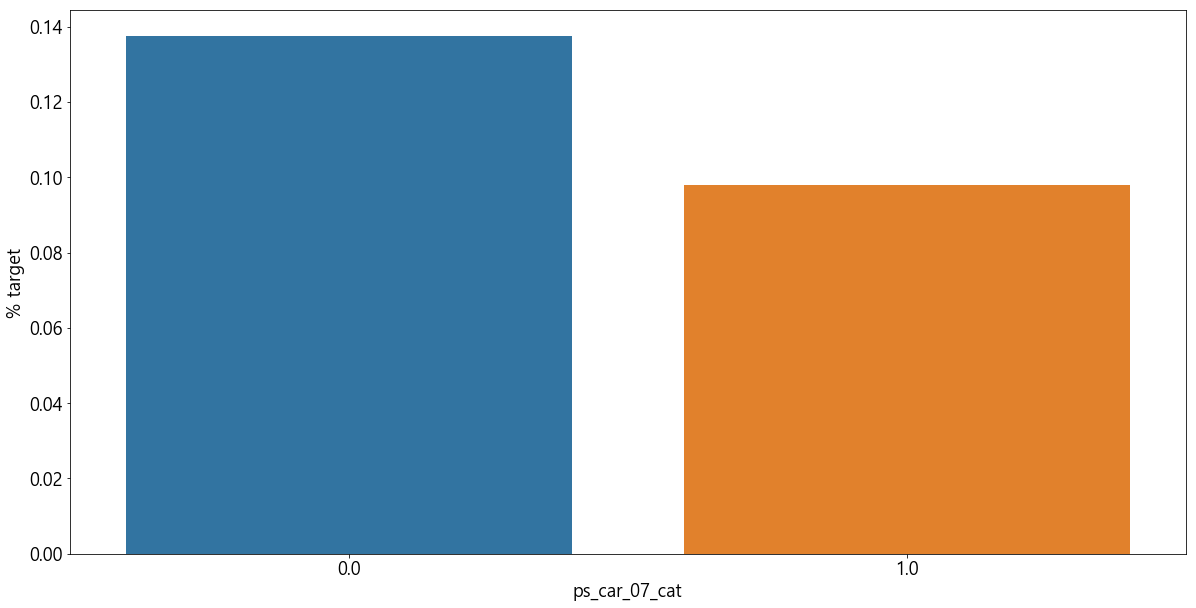

<Figure size 432x288 with 0 Axes>

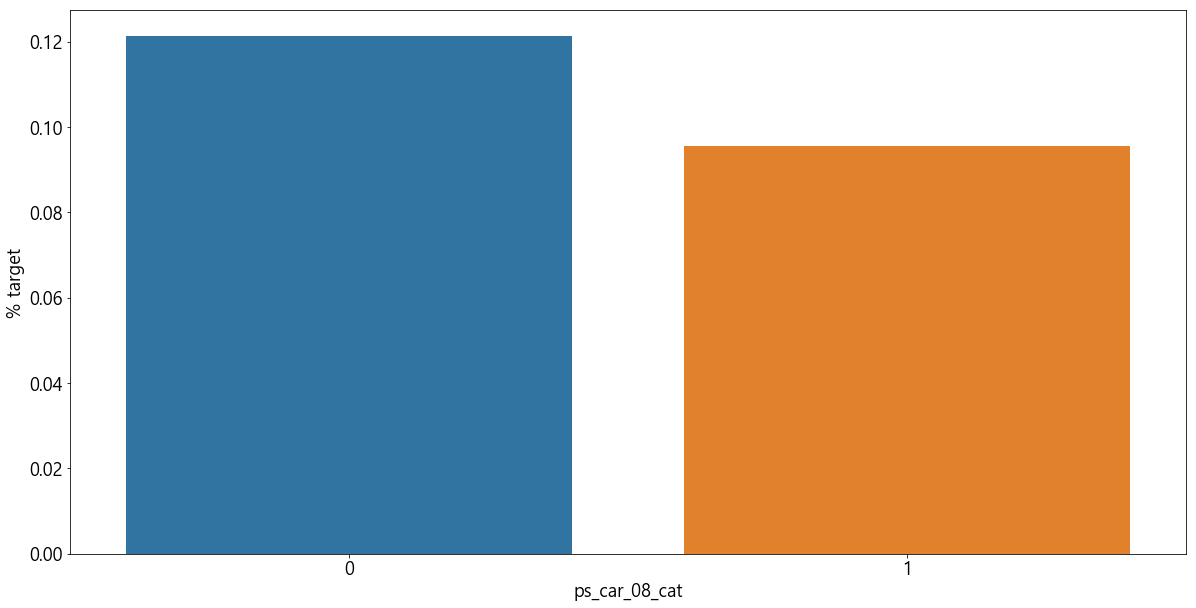

<Figure size 432x288 with 0 Axes>

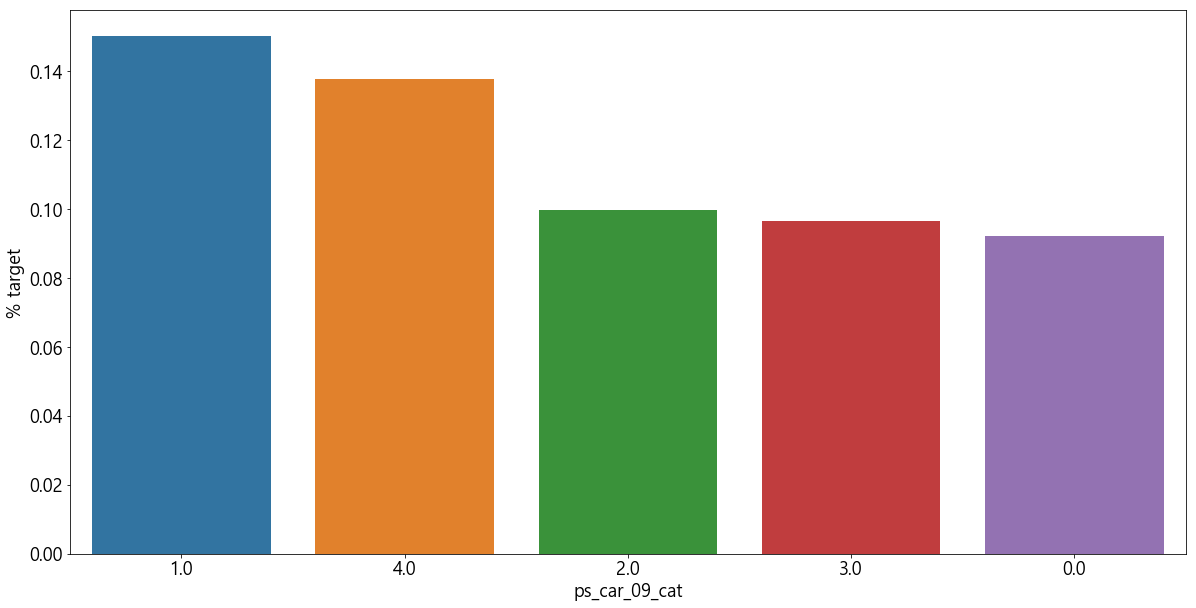

<Figure size 432x288 with 0 Axes>

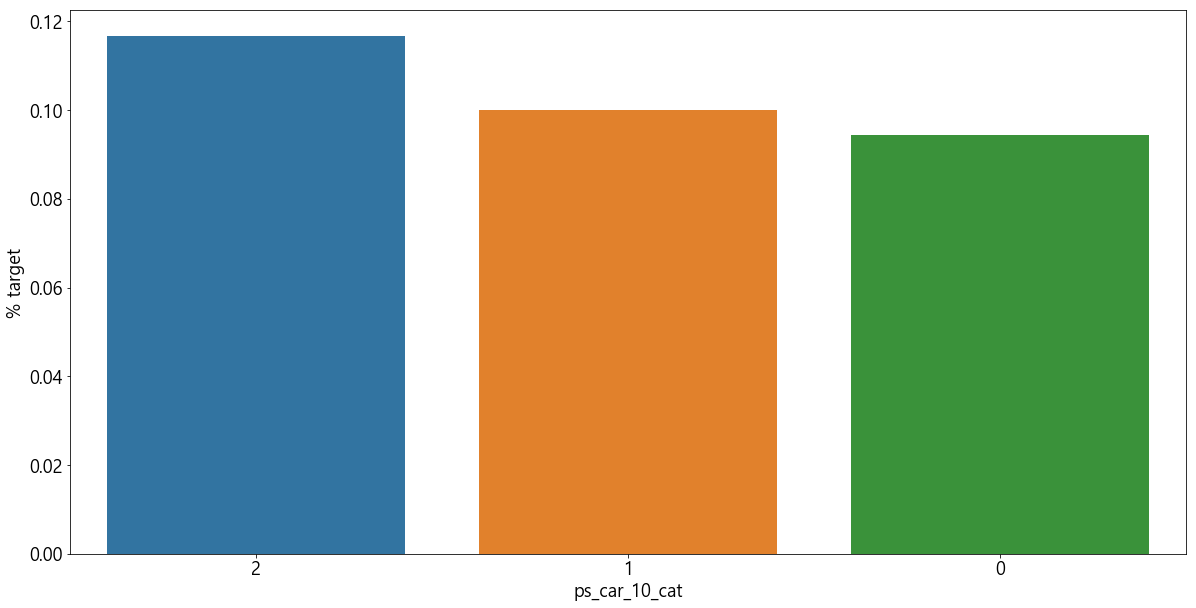

In [161]:
make_plot(datatype = 'nominal')

<Figure size 432x288 with 0 Axes>

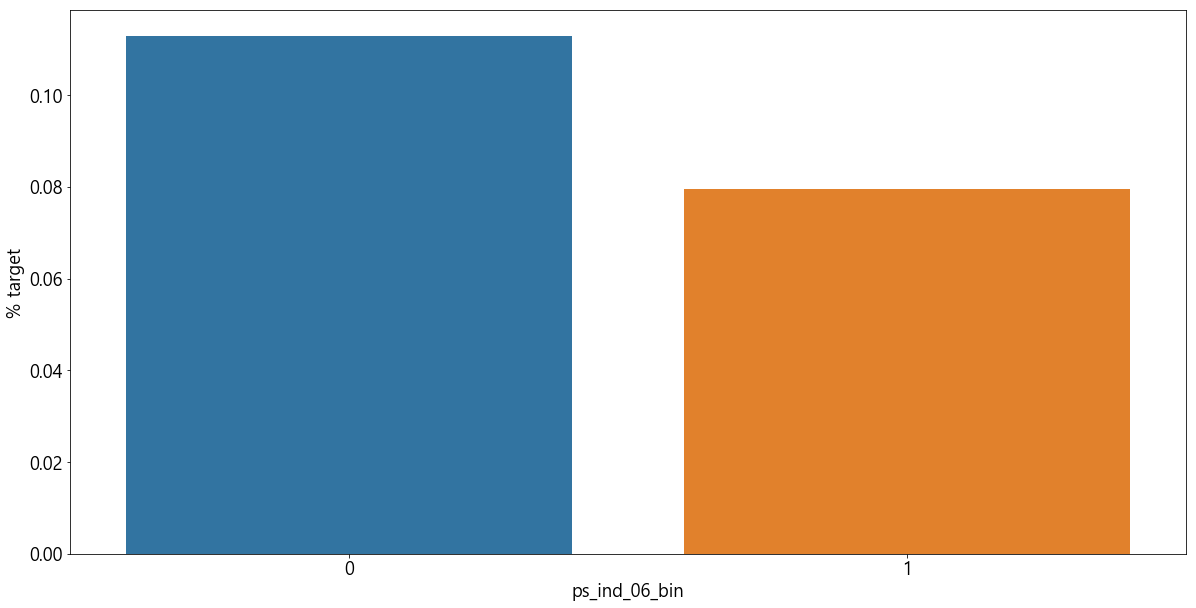

<Figure size 432x288 with 0 Axes>

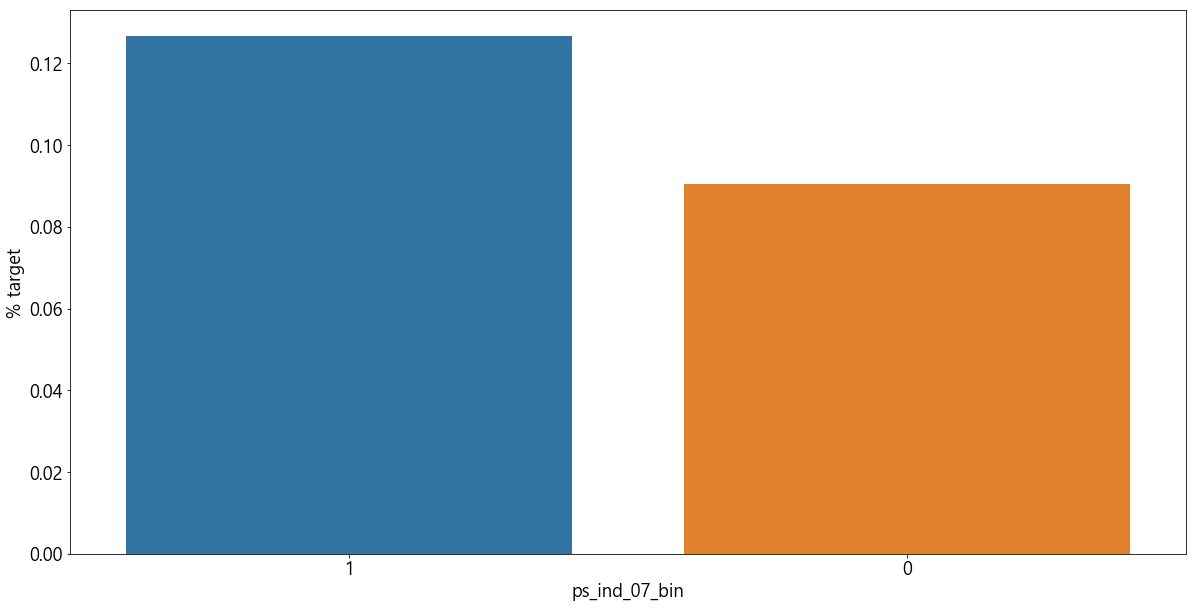

<Figure size 432x288 with 0 Axes>

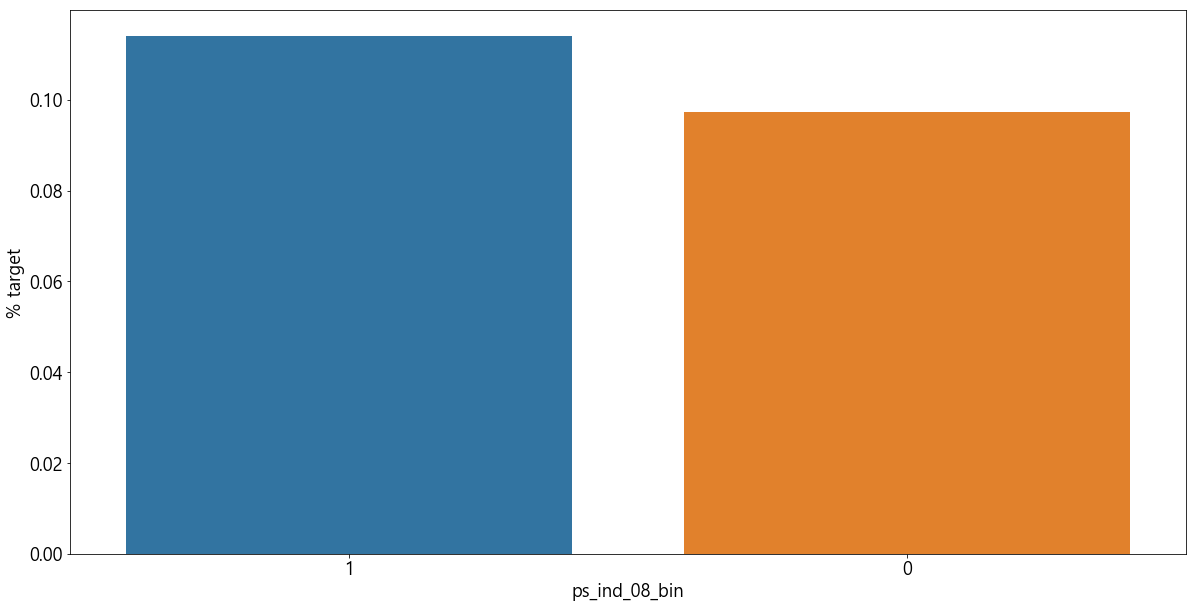

<Figure size 432x288 with 0 Axes>

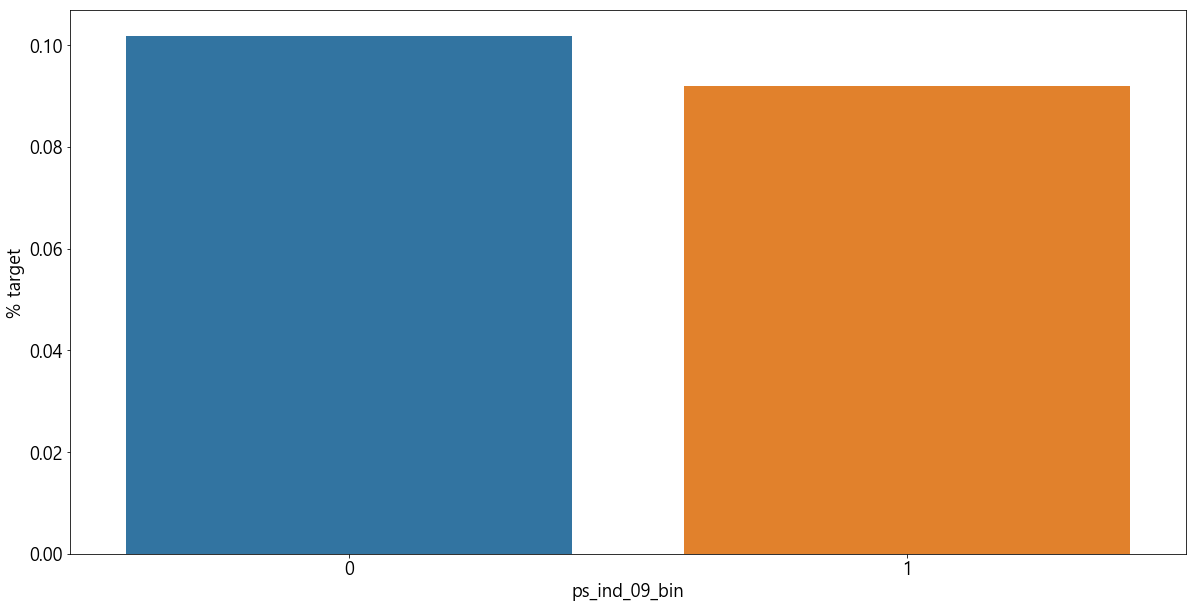

<Figure size 432x288 with 0 Axes>

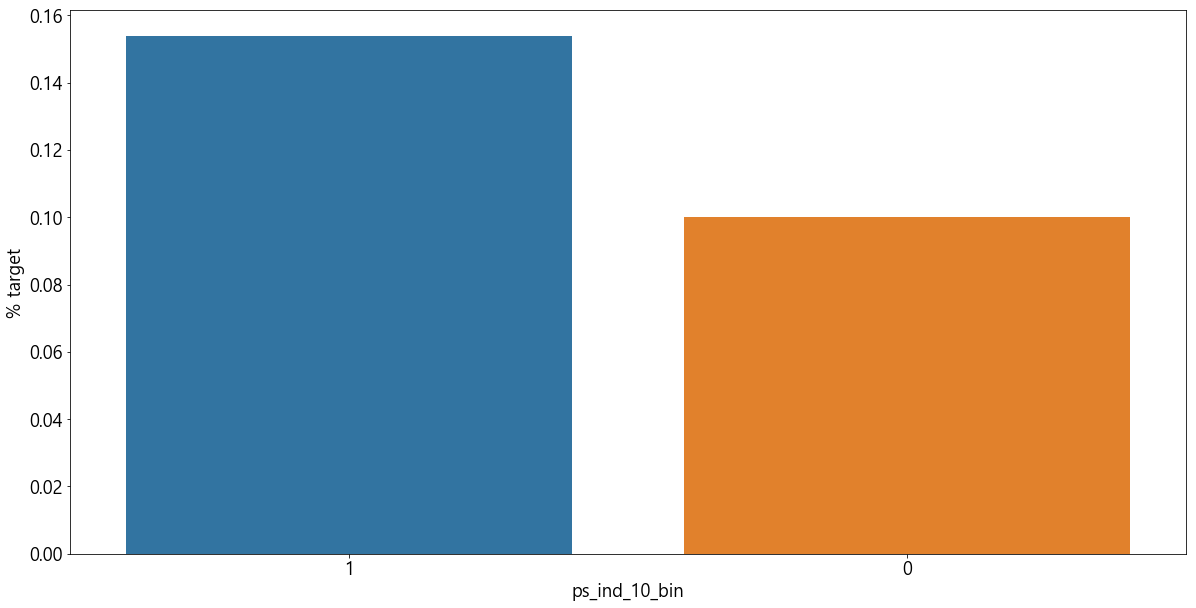

<Figure size 432x288 with 0 Axes>

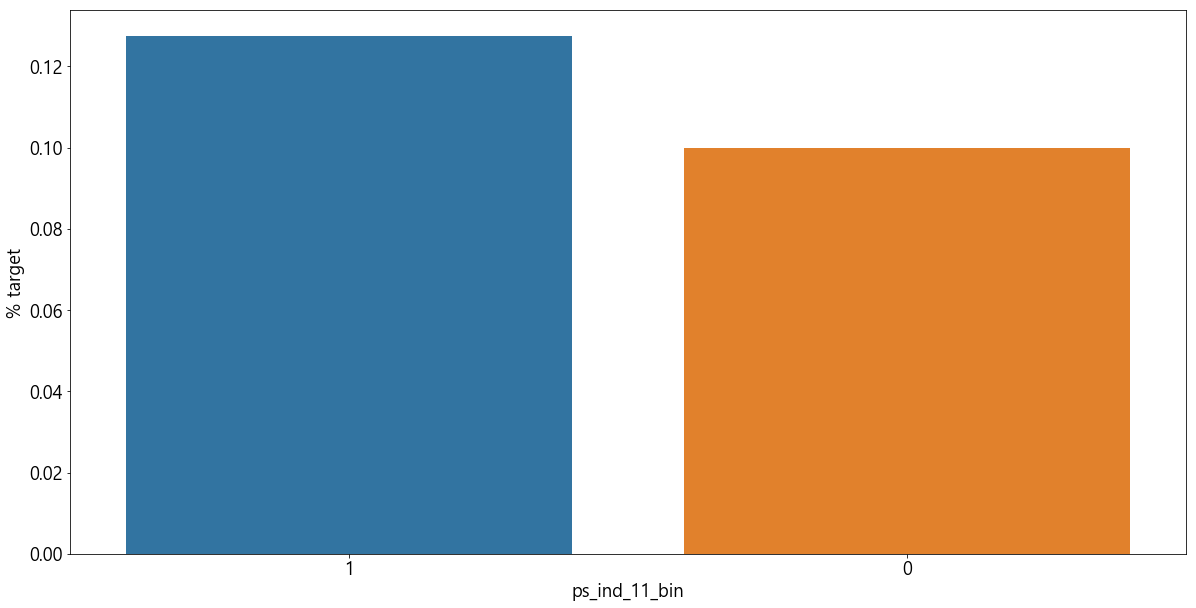

<Figure size 432x288 with 0 Axes>

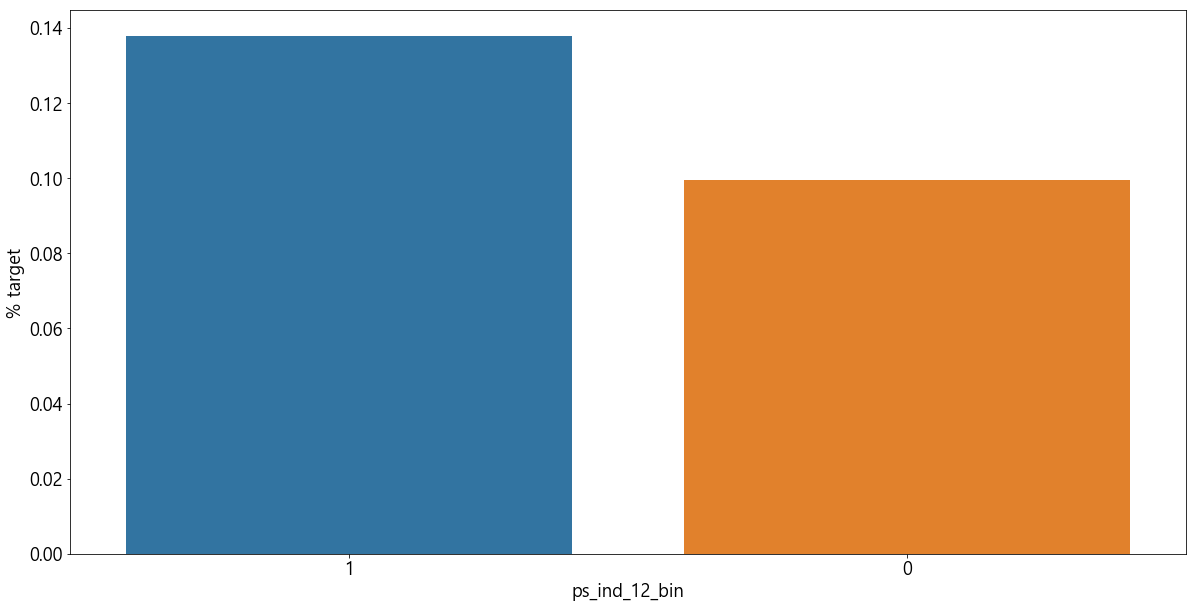

<Figure size 432x288 with 0 Axes>

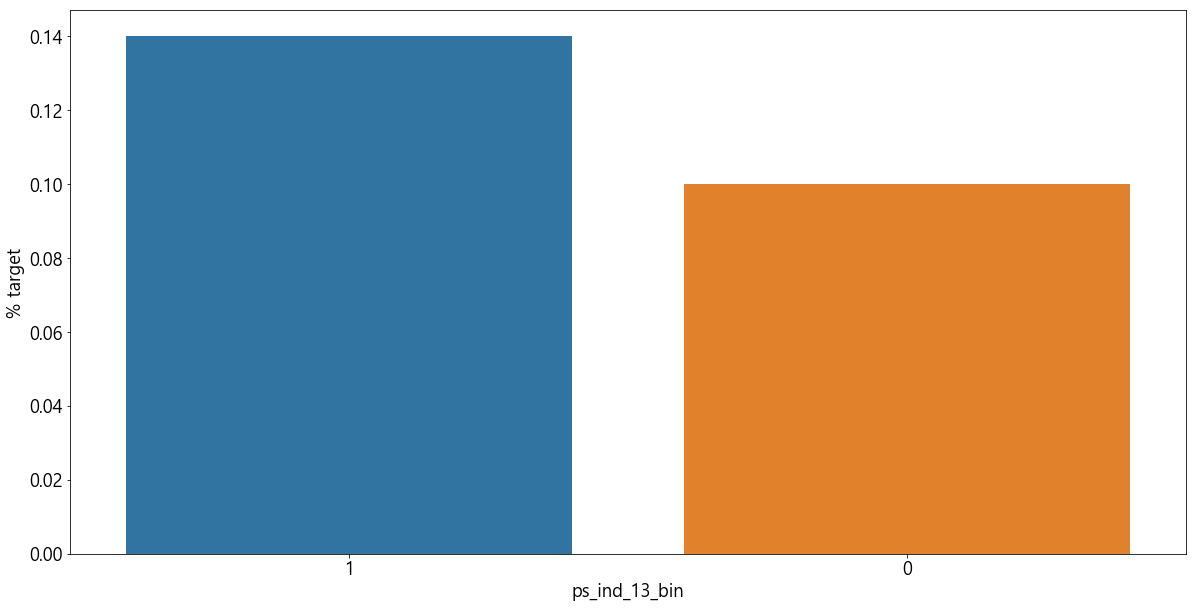

<Figure size 432x288 with 0 Axes>

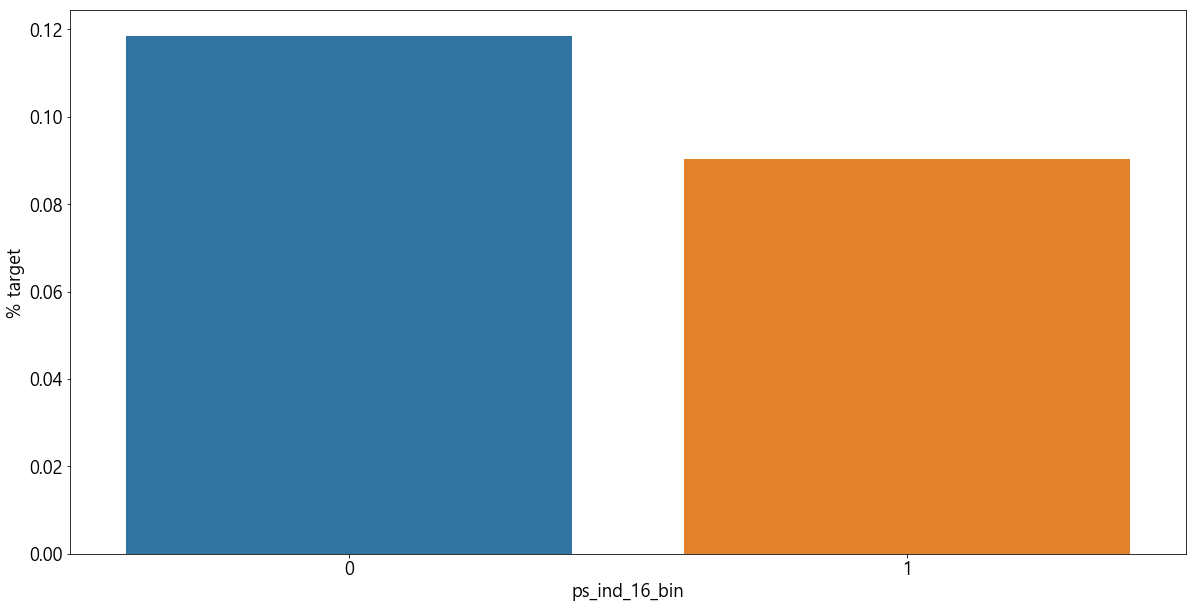

<Figure size 432x288 with 0 Axes>

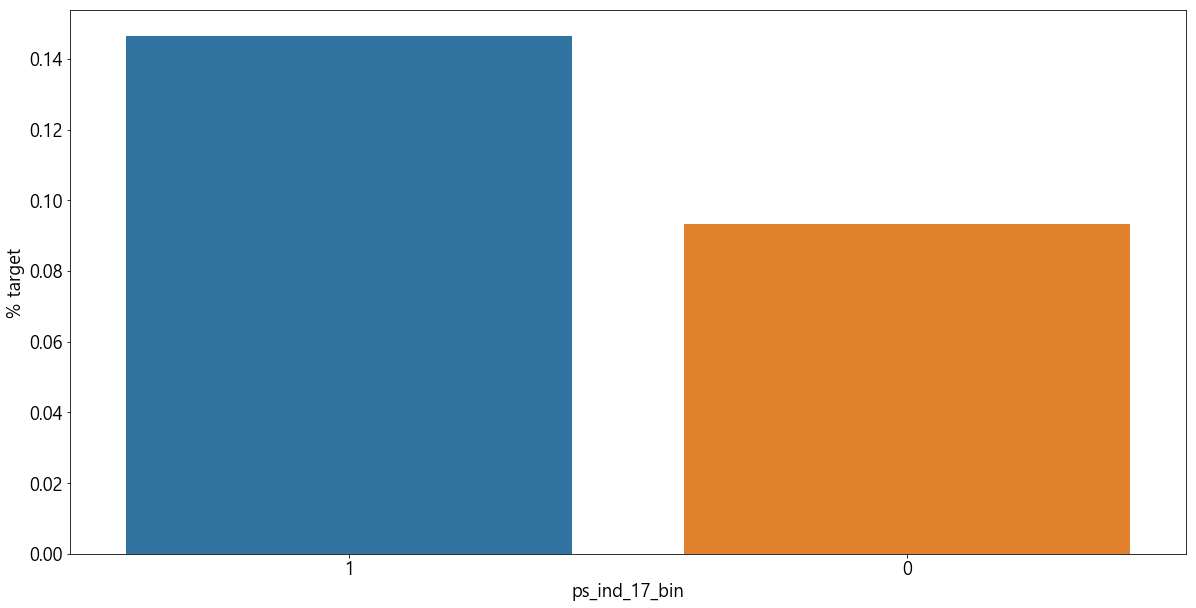

<Figure size 432x288 with 0 Axes>

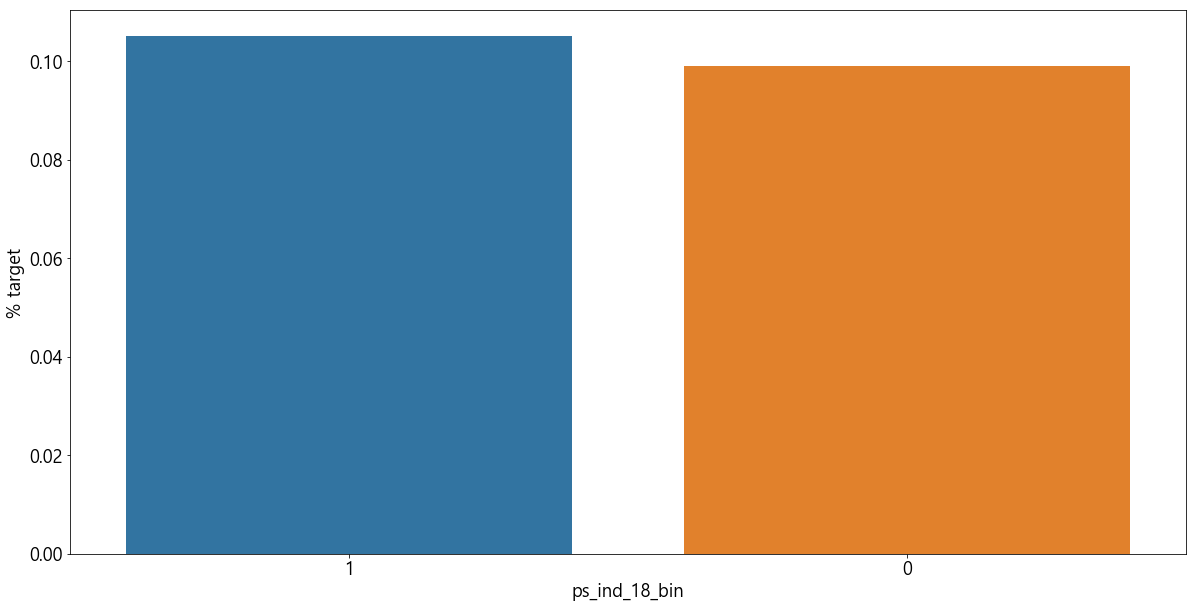

<Figure size 432x288 with 0 Axes>

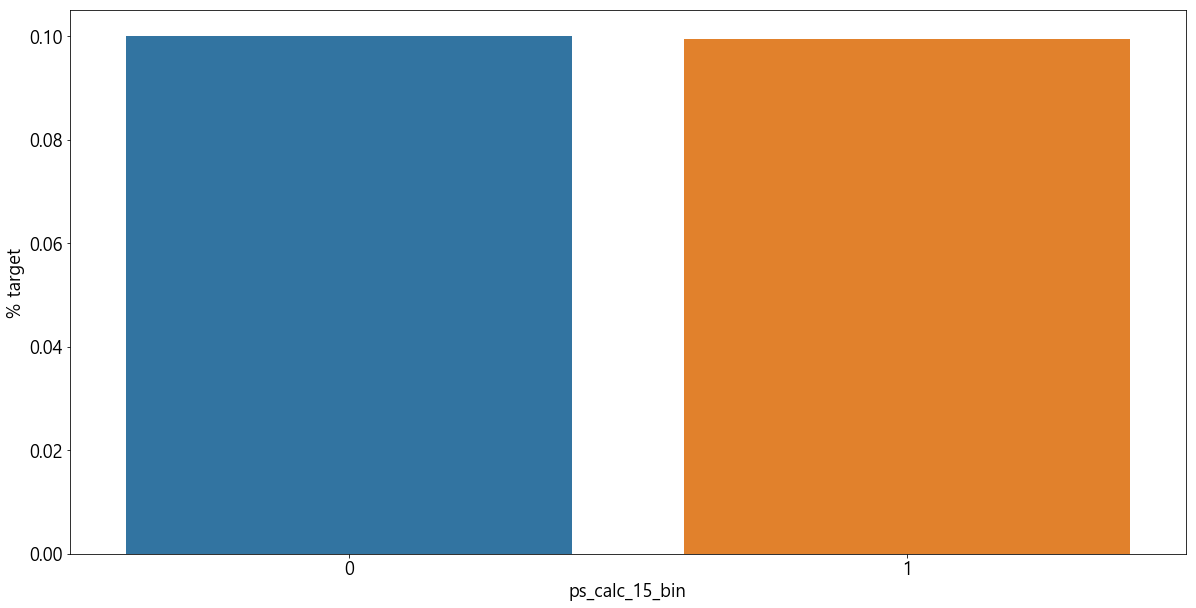

<Figure size 432x288 with 0 Axes>

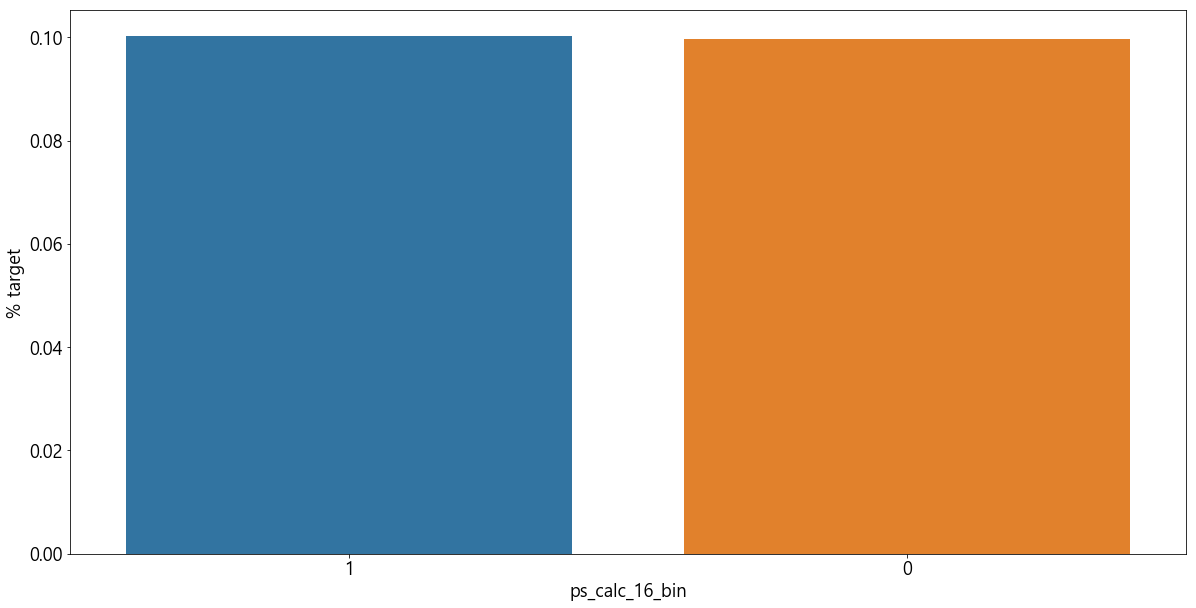

<Figure size 432x288 with 0 Axes>

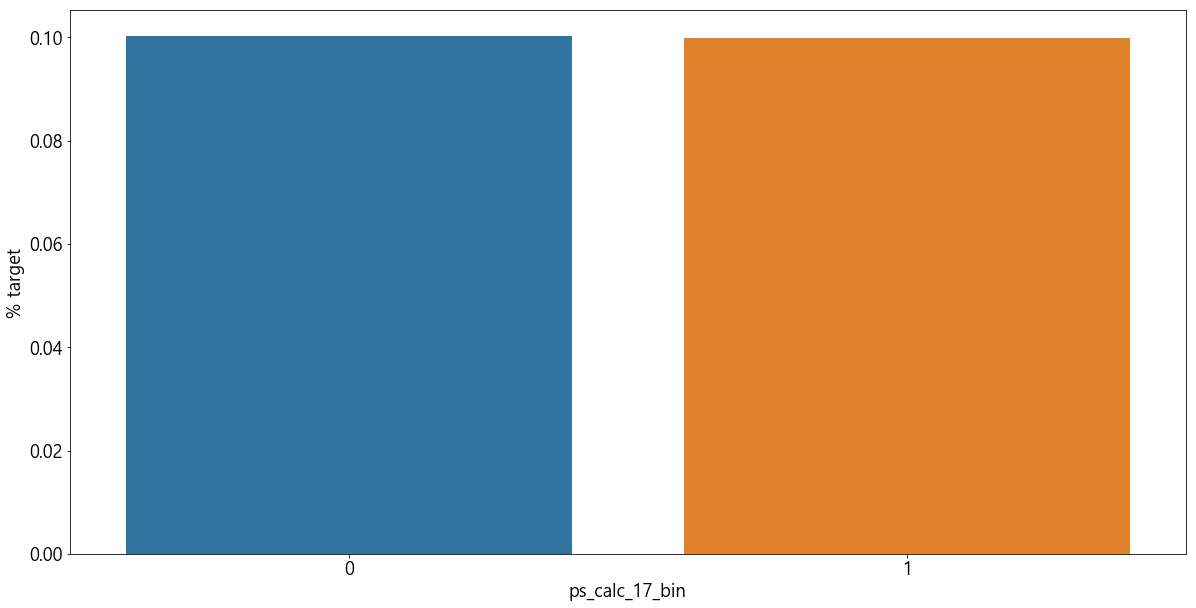

<Figure size 432x288 with 0 Axes>

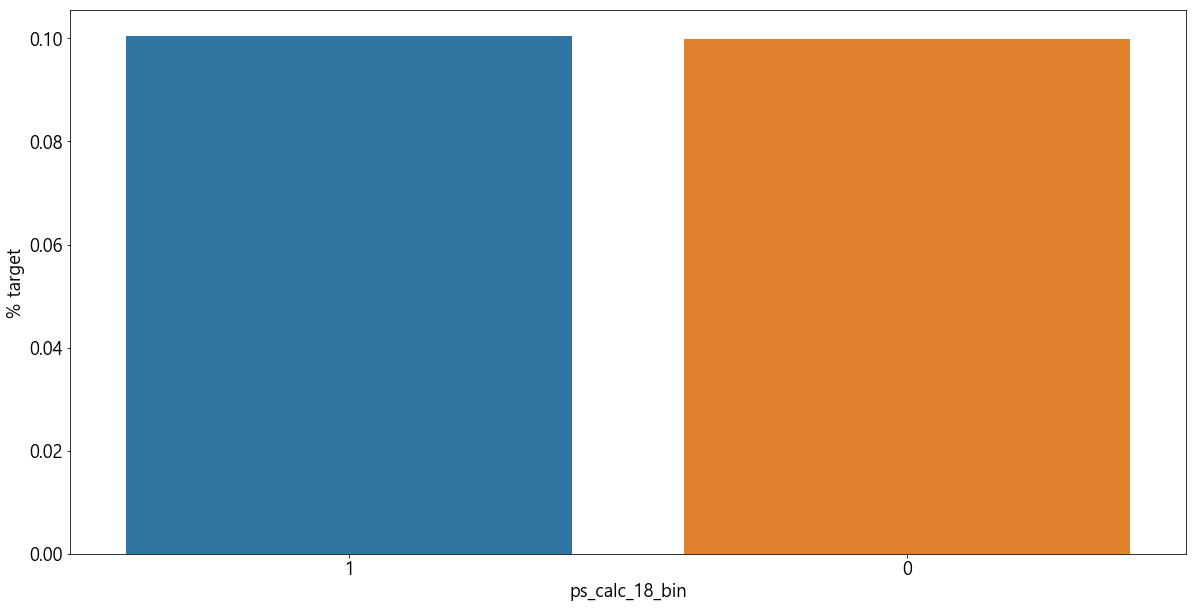

<Figure size 432x288 with 0 Axes>

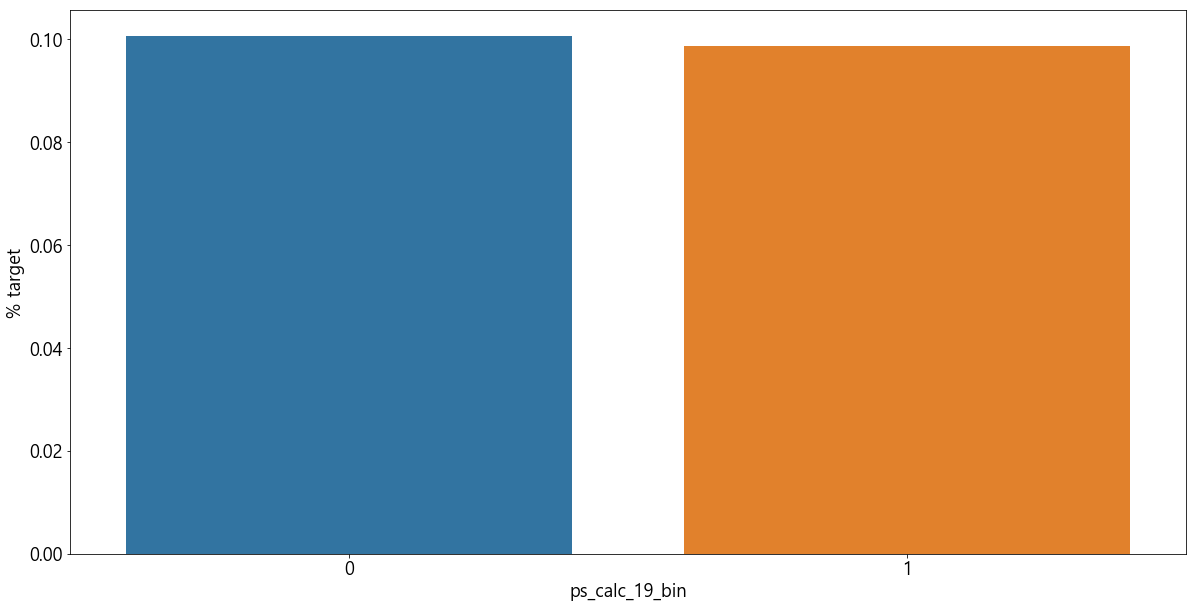

<Figure size 432x288 with 0 Axes>

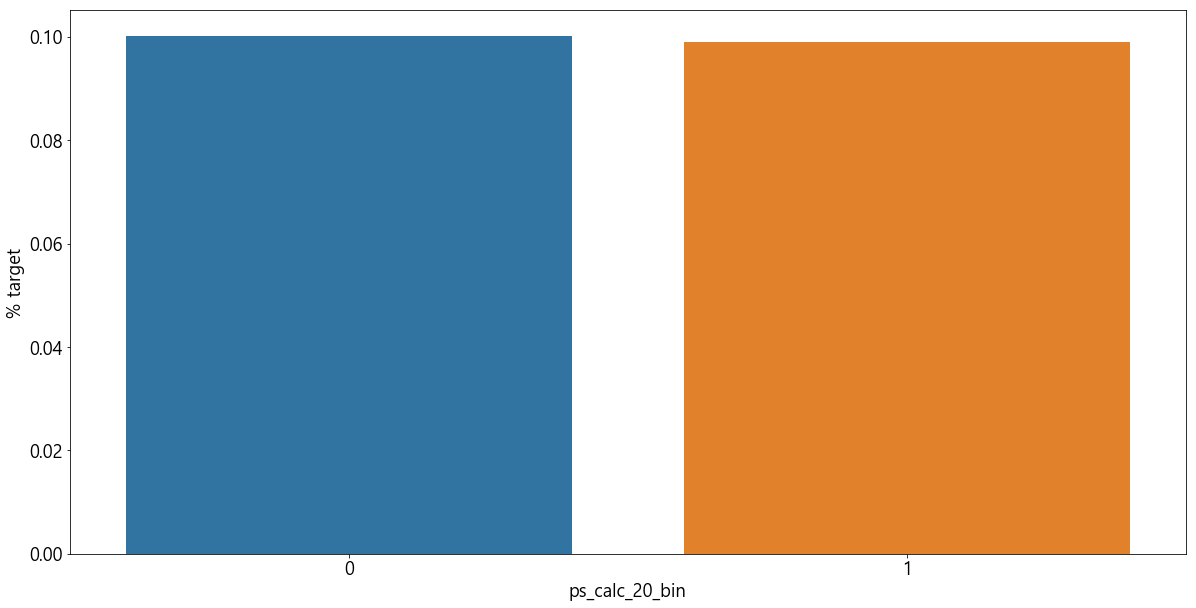

In [164]:
make_plot(datatype = 'binary')

`target`이 1인 개수

<Figure size 432x288 with 0 Axes>

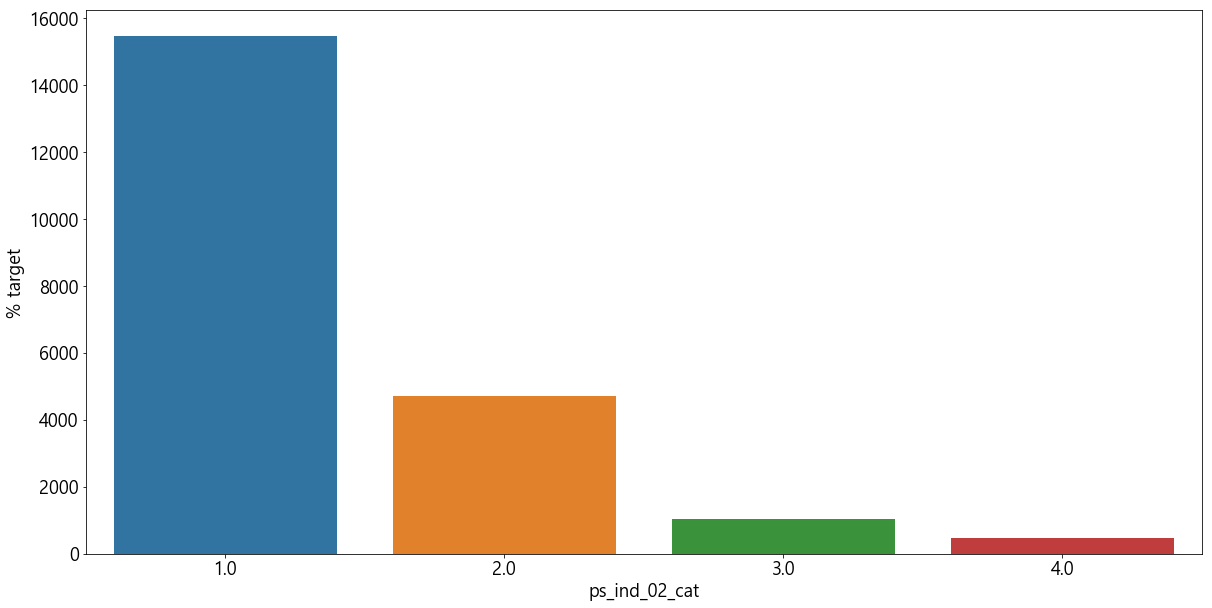

<Figure size 432x288 with 0 Axes>

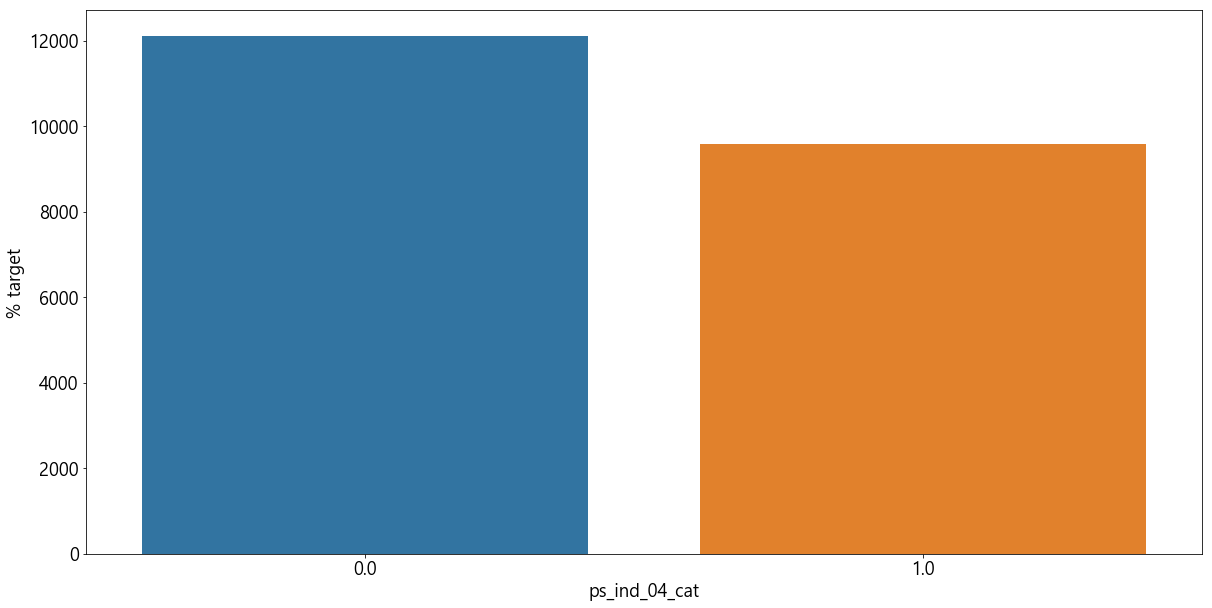

<Figure size 432x288 with 0 Axes>

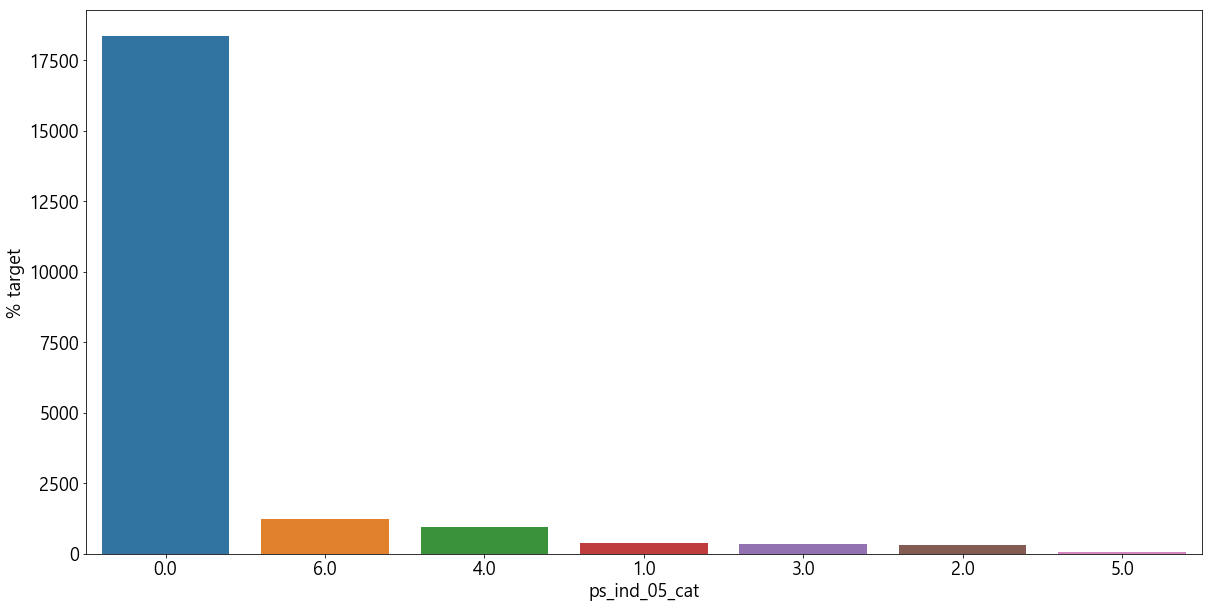

<Figure size 432x288 with 0 Axes>

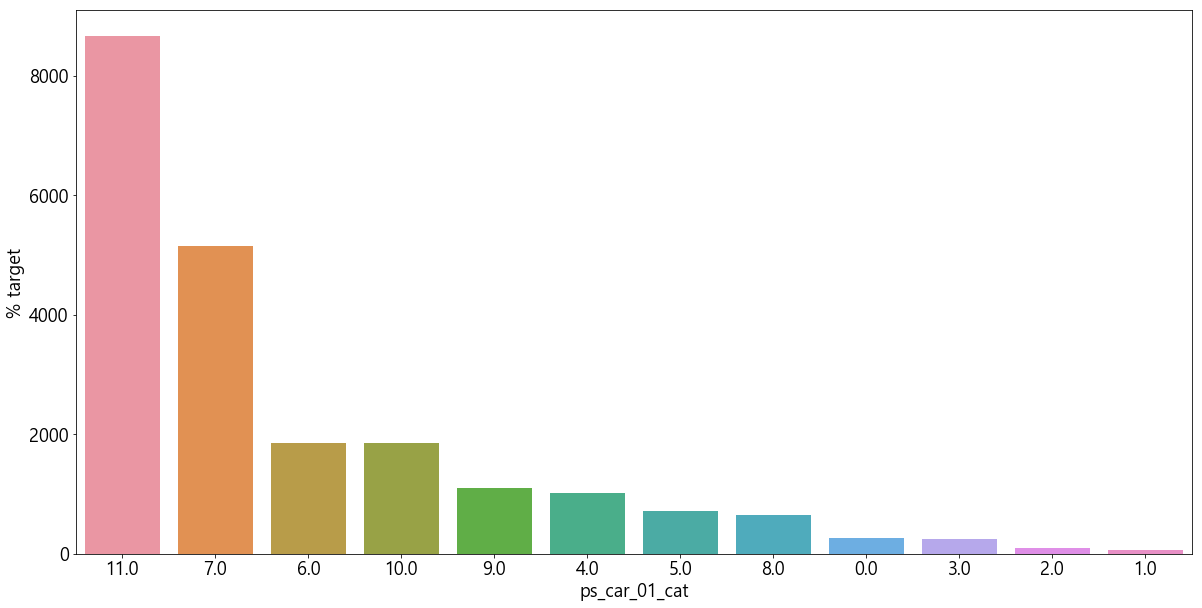

<Figure size 432x288 with 0 Axes>

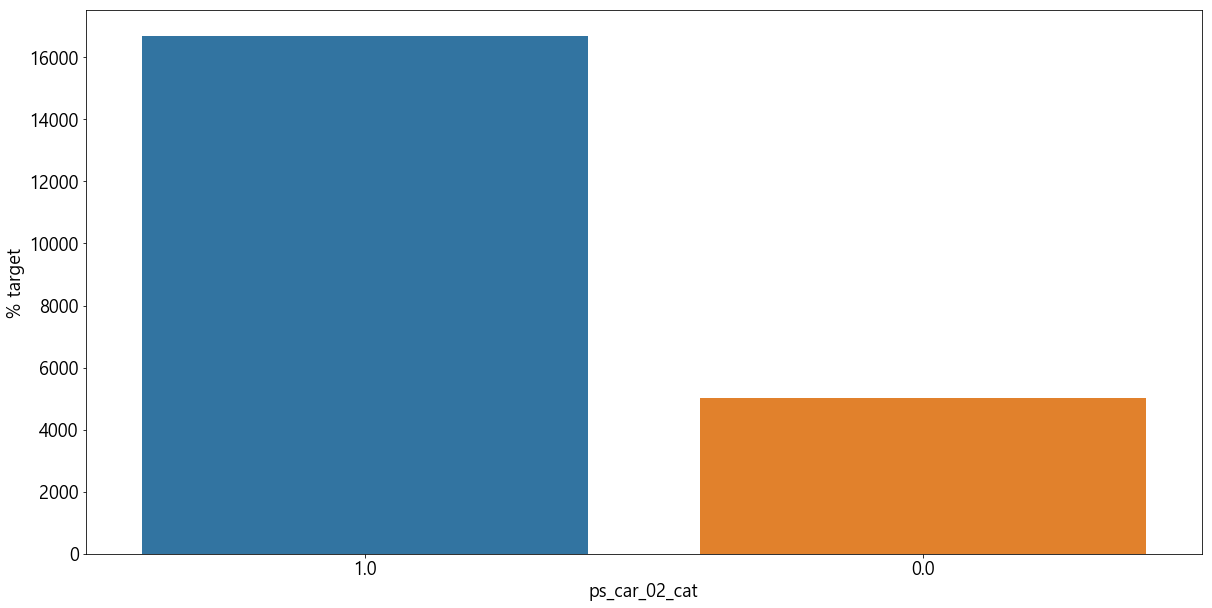

<Figure size 432x288 with 0 Axes>

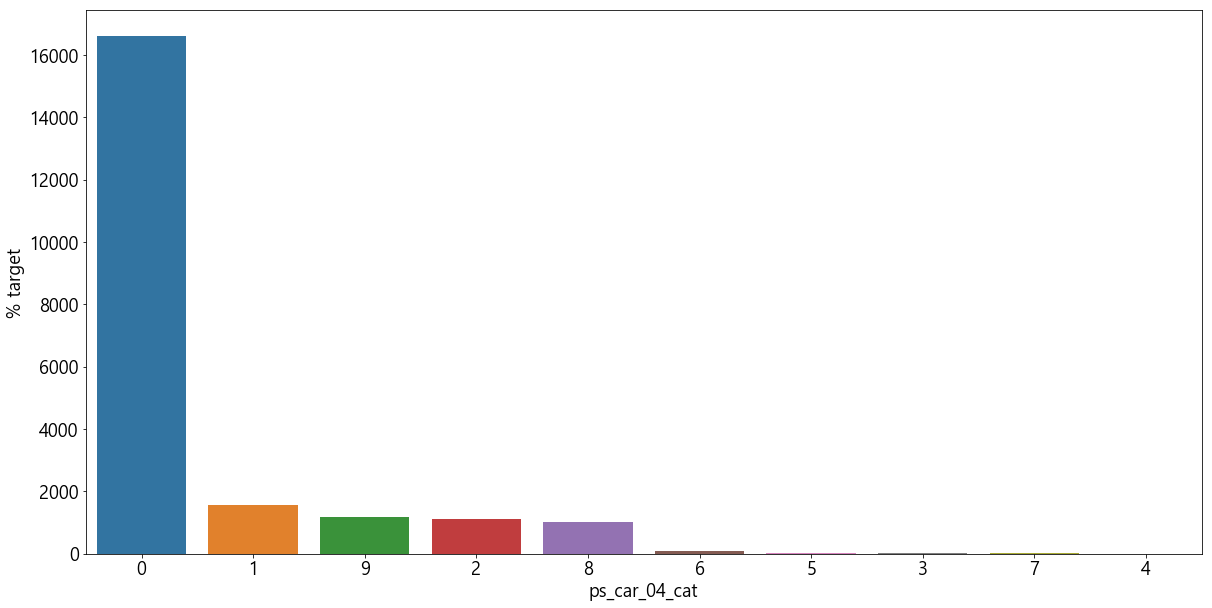

<Figure size 432x288 with 0 Axes>

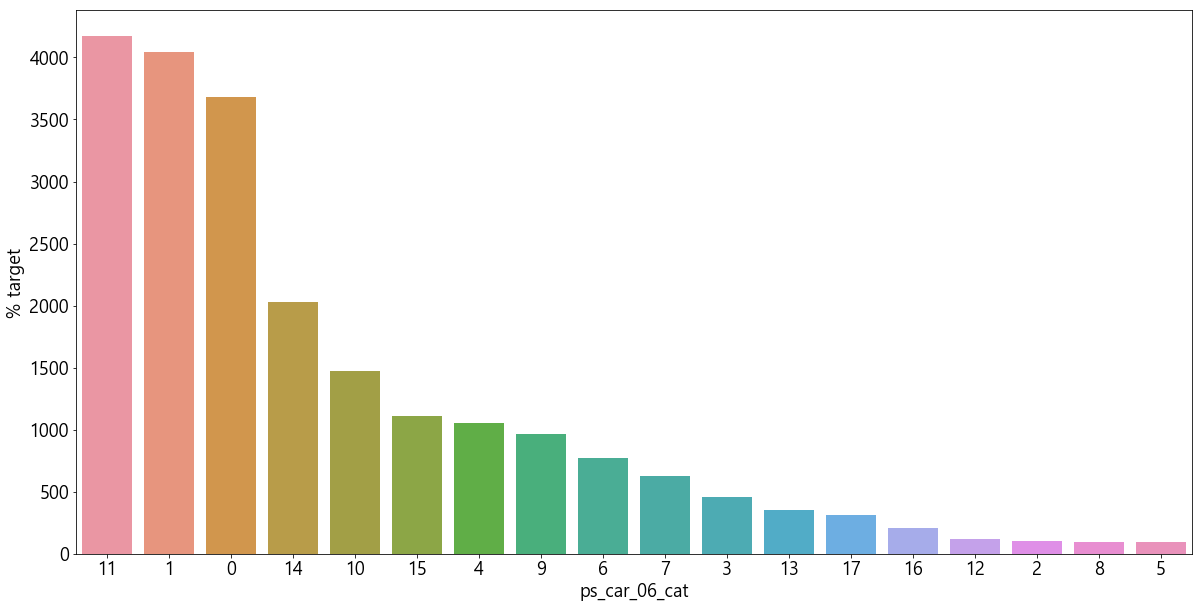

<Figure size 432x288 with 0 Axes>

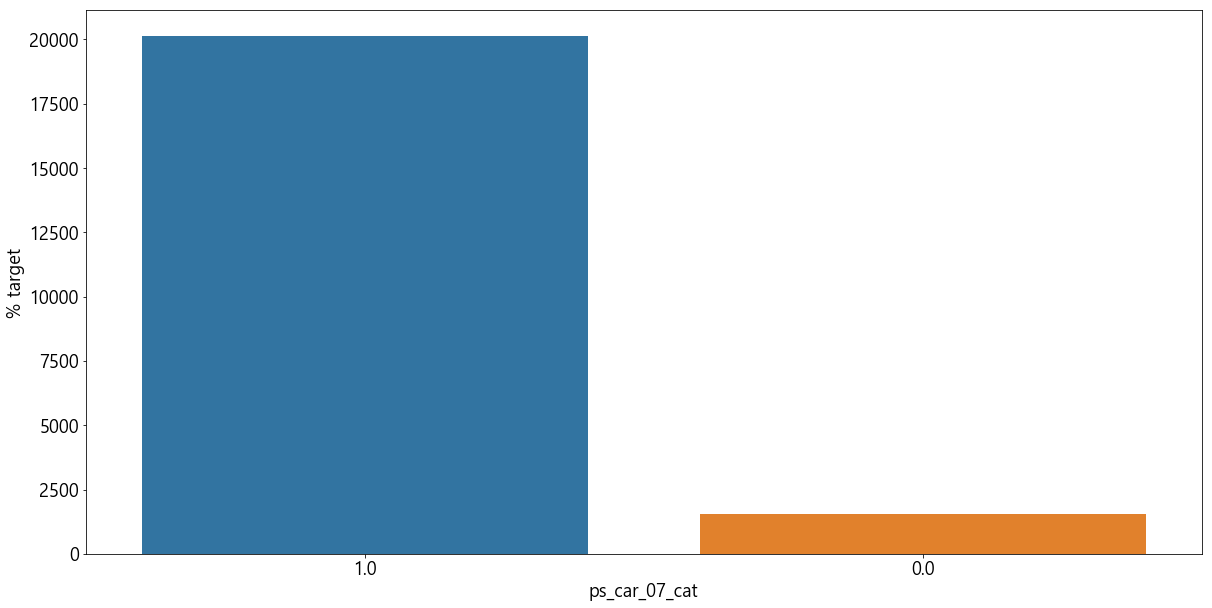

<Figure size 432x288 with 0 Axes>

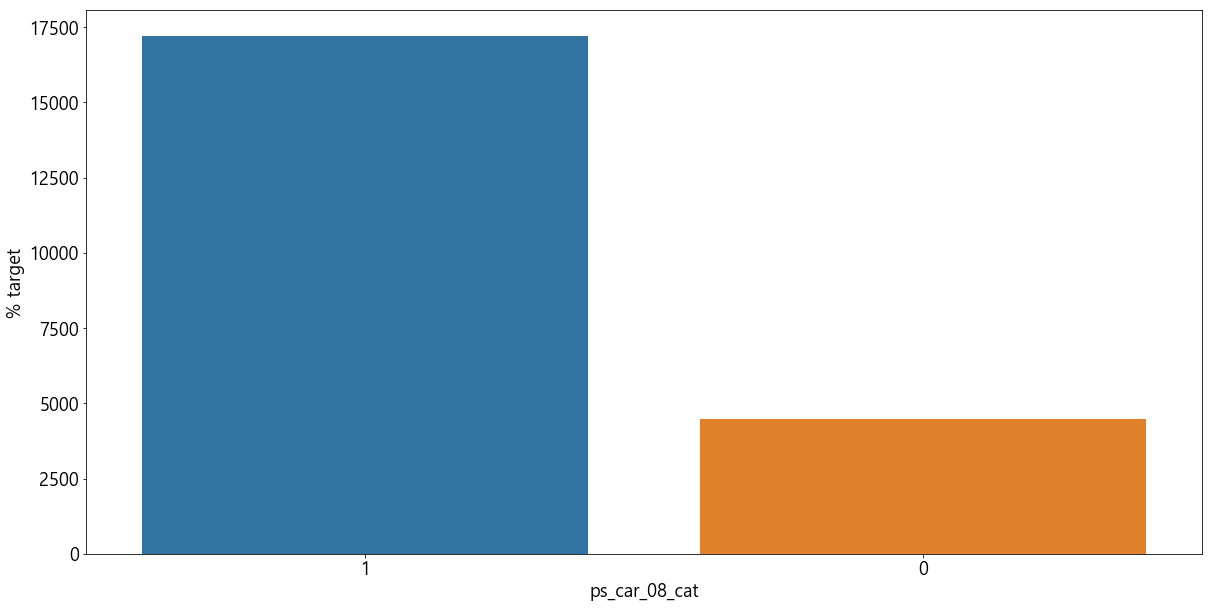

<Figure size 432x288 with 0 Axes>

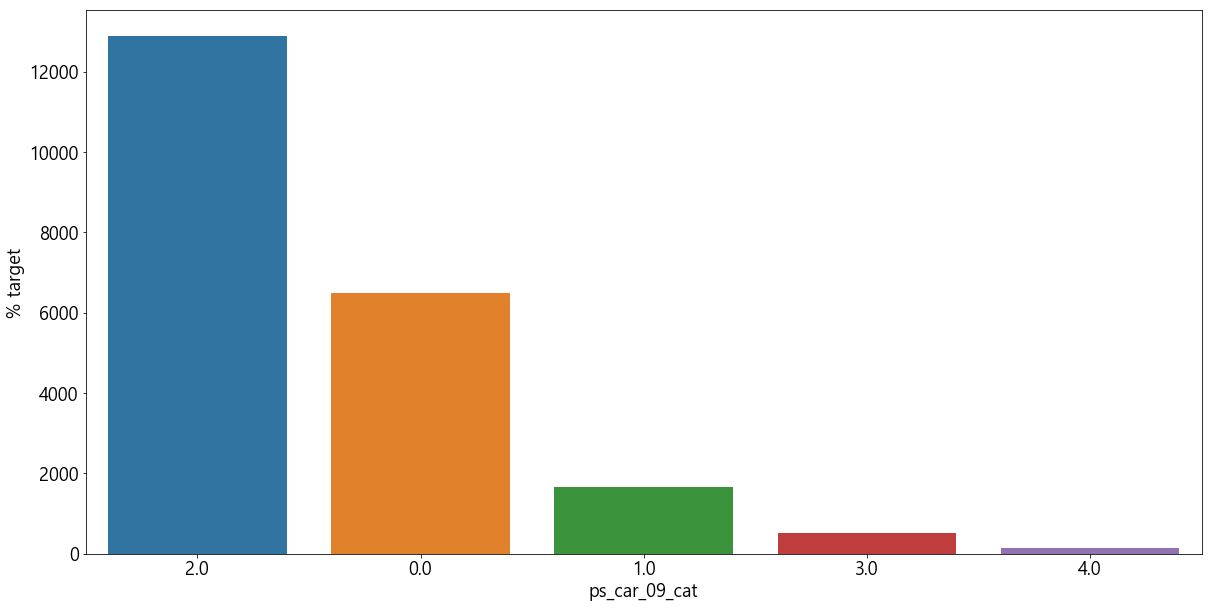

<Figure size 432x288 with 0 Axes>

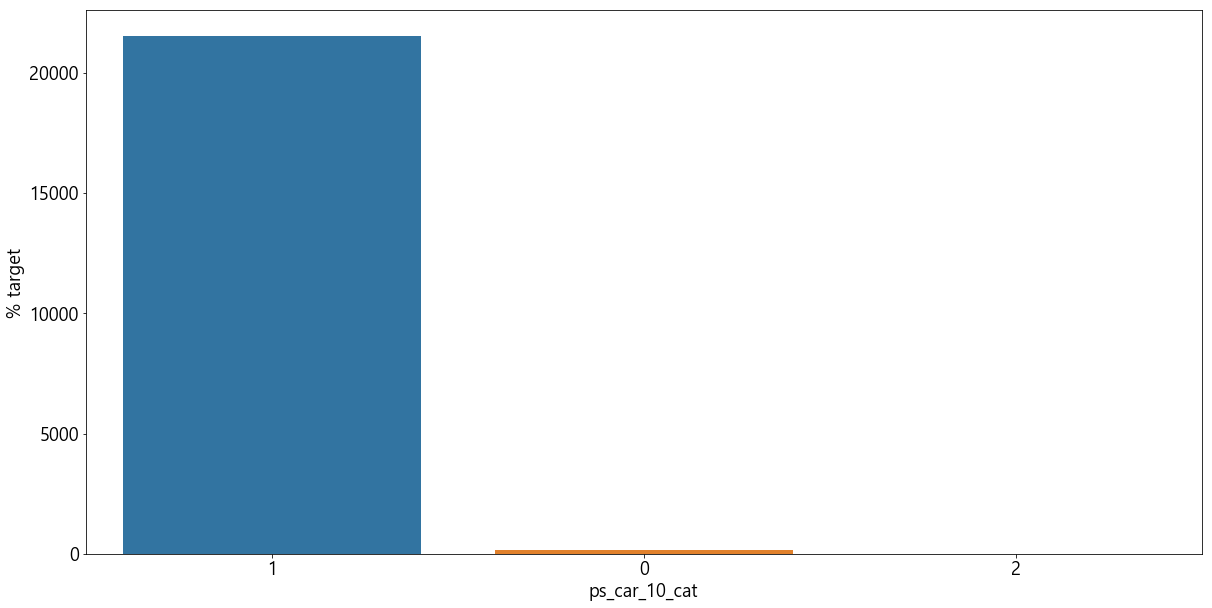

In [163]:
make_plot(datatype = 'nominal', percent = False)

<Figure size 432x288 with 0 Axes>

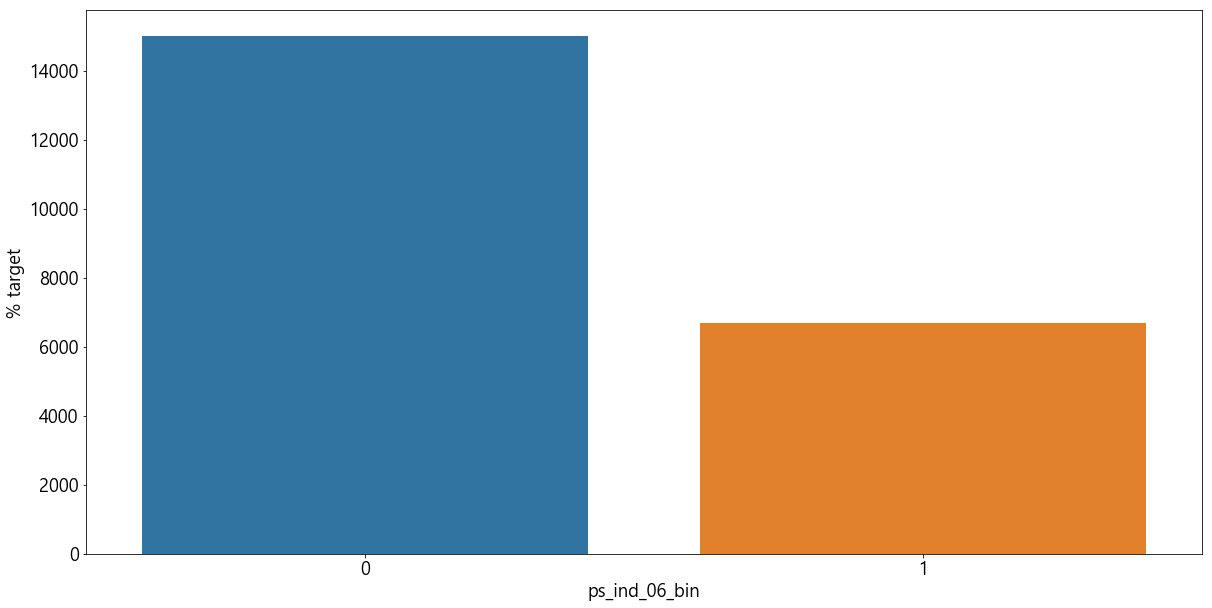

<Figure size 432x288 with 0 Axes>

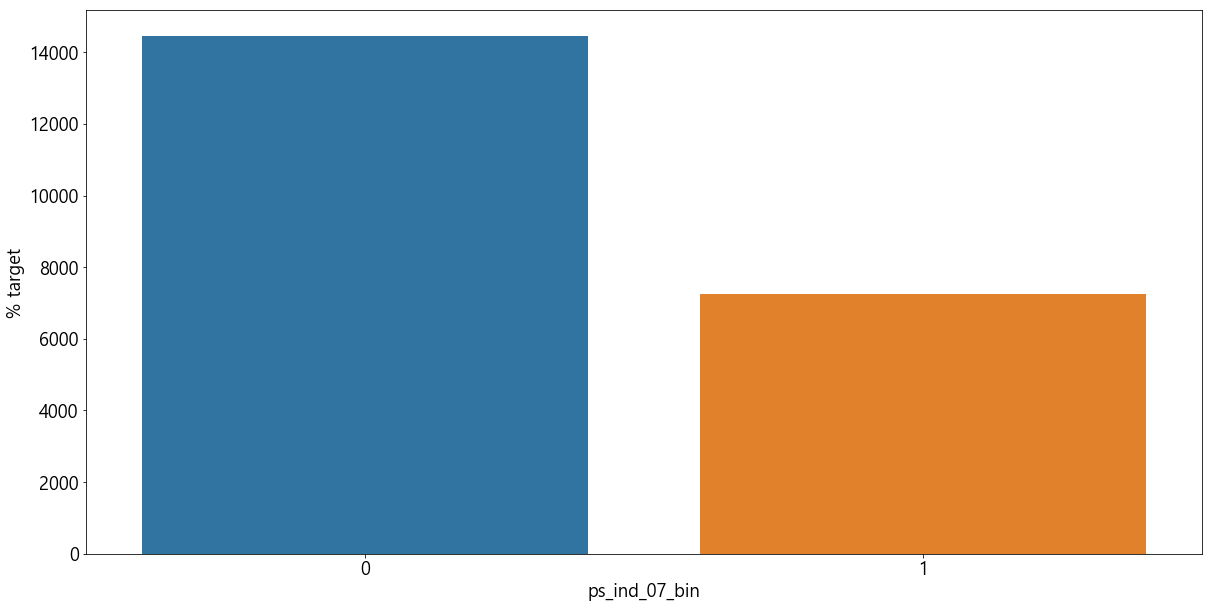

<Figure size 432x288 with 0 Axes>

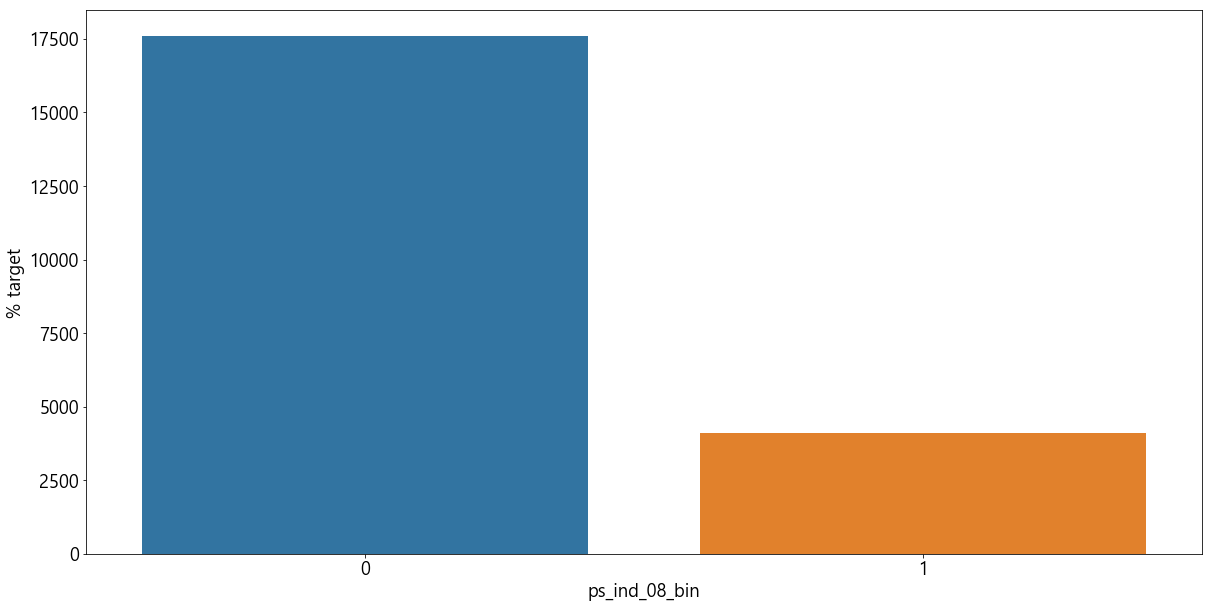

<Figure size 432x288 with 0 Axes>

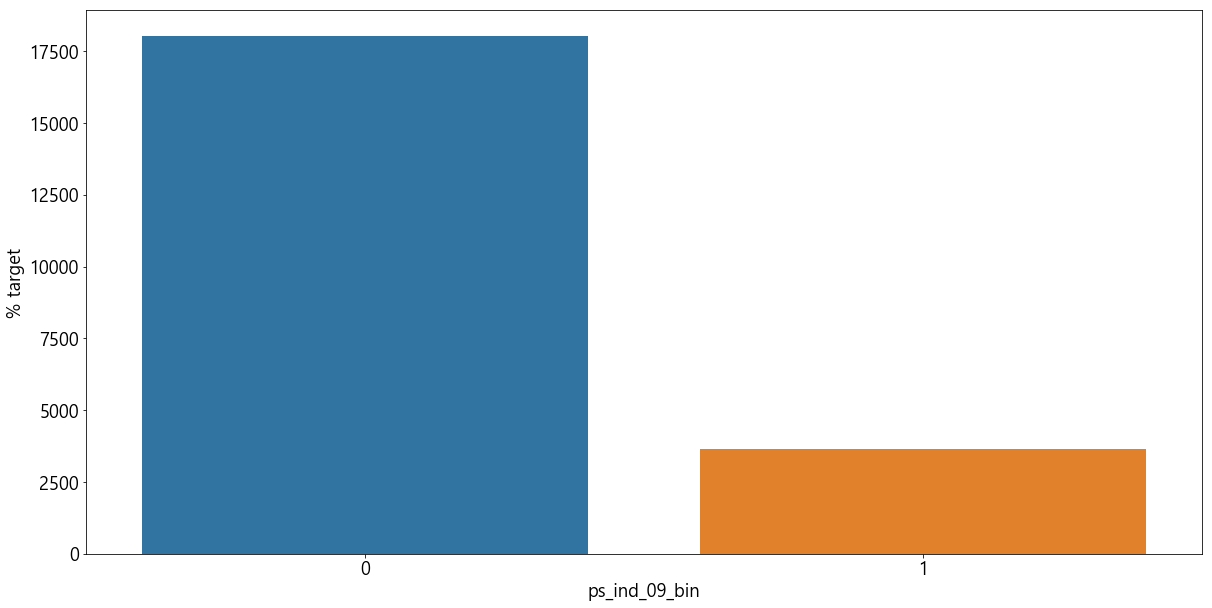

<Figure size 432x288 with 0 Axes>

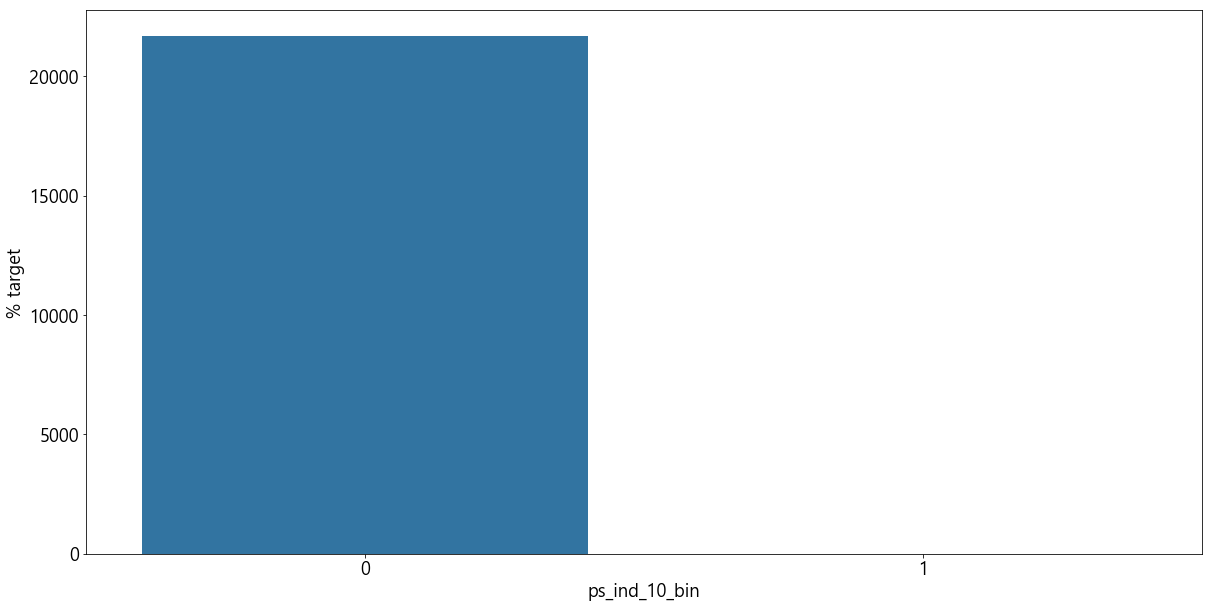

<Figure size 432x288 with 0 Axes>

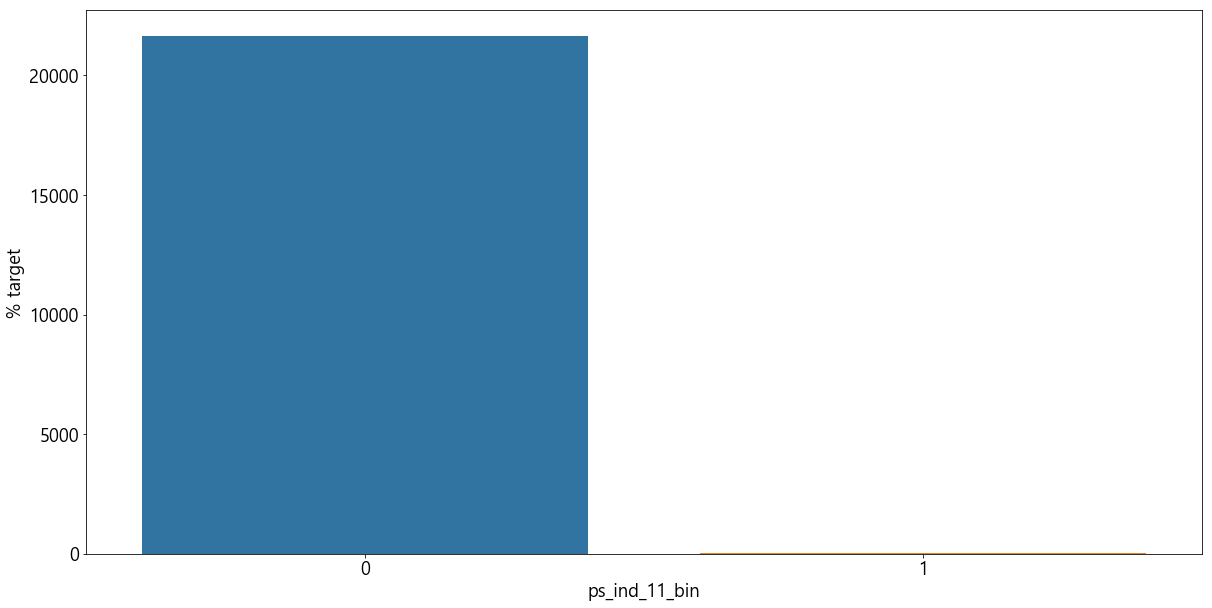

<Figure size 432x288 with 0 Axes>

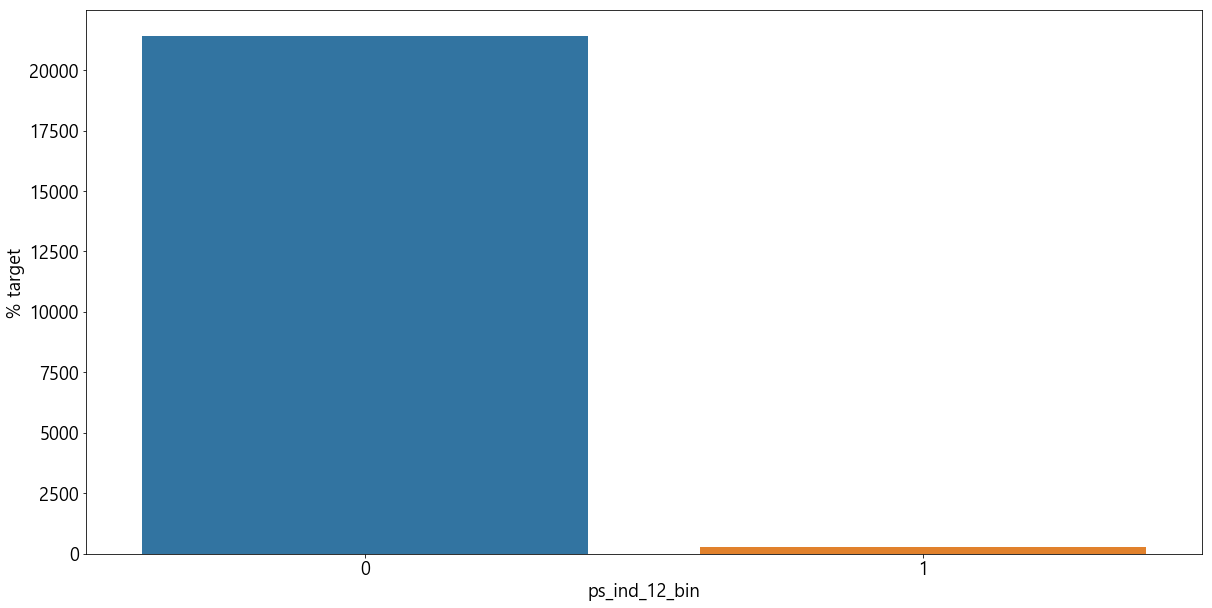

<Figure size 432x288 with 0 Axes>

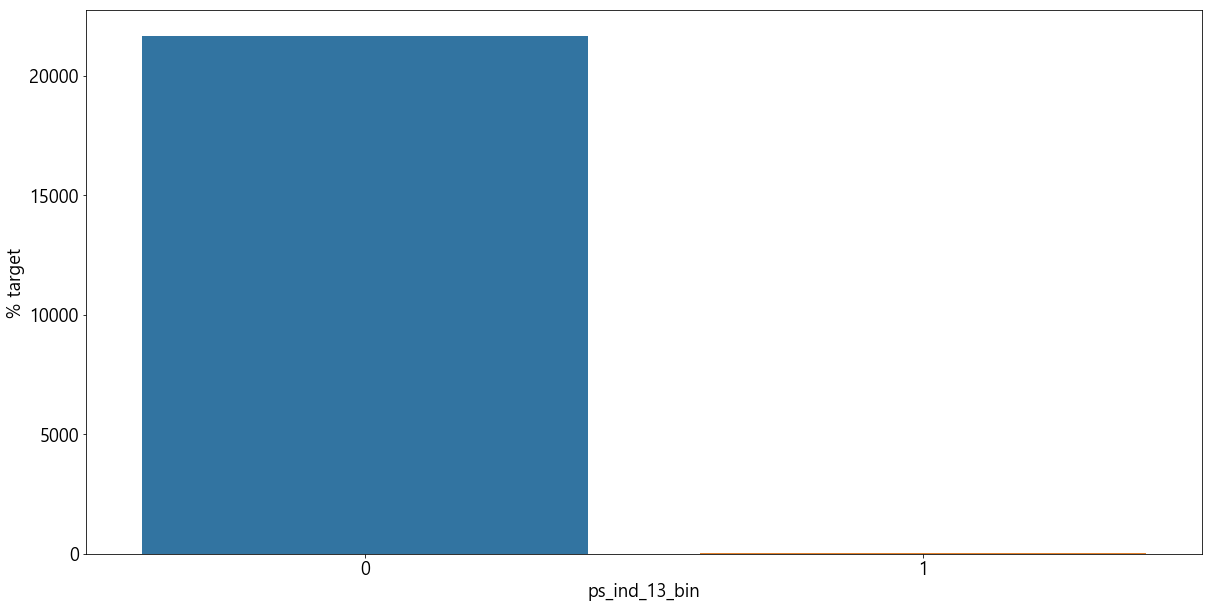

<Figure size 432x288 with 0 Axes>

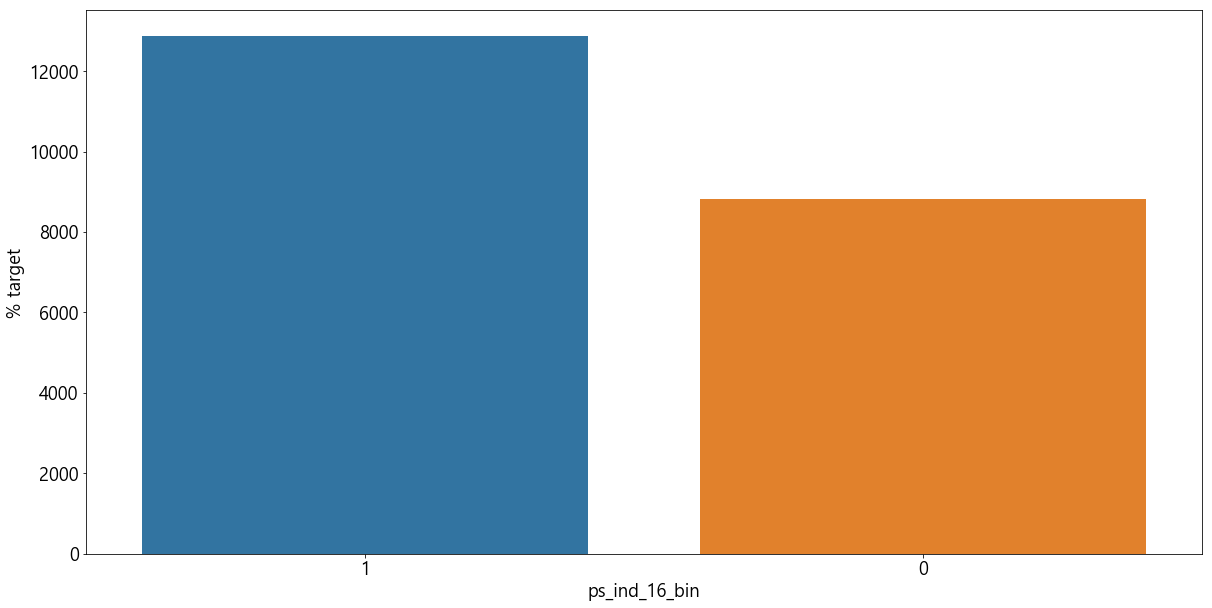

<Figure size 432x288 with 0 Axes>

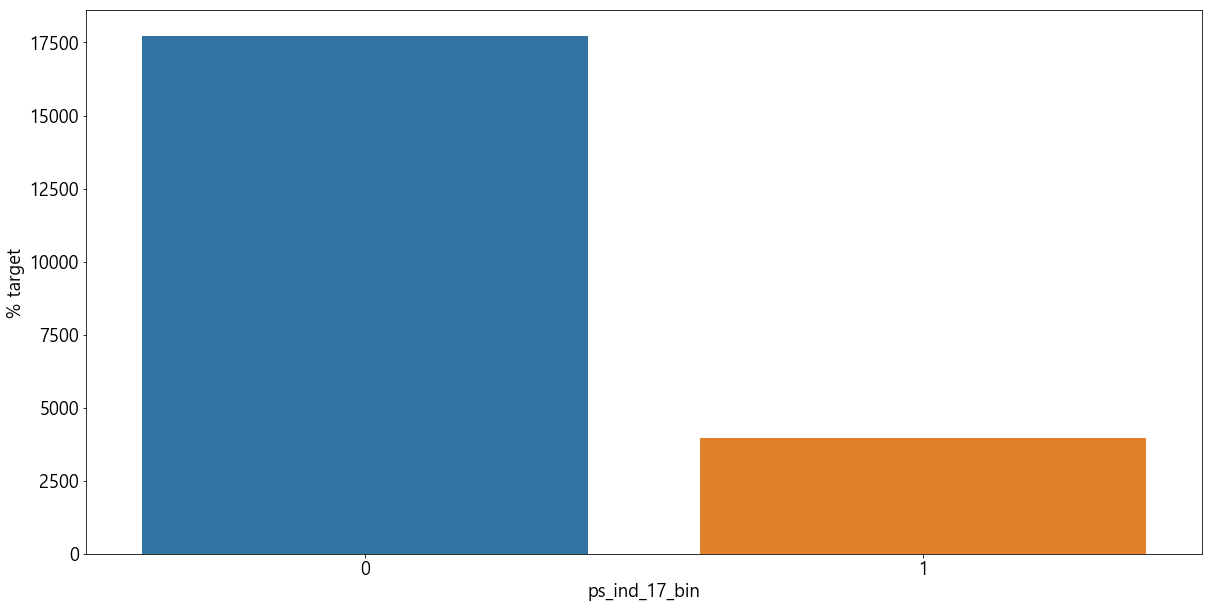

<Figure size 432x288 with 0 Axes>

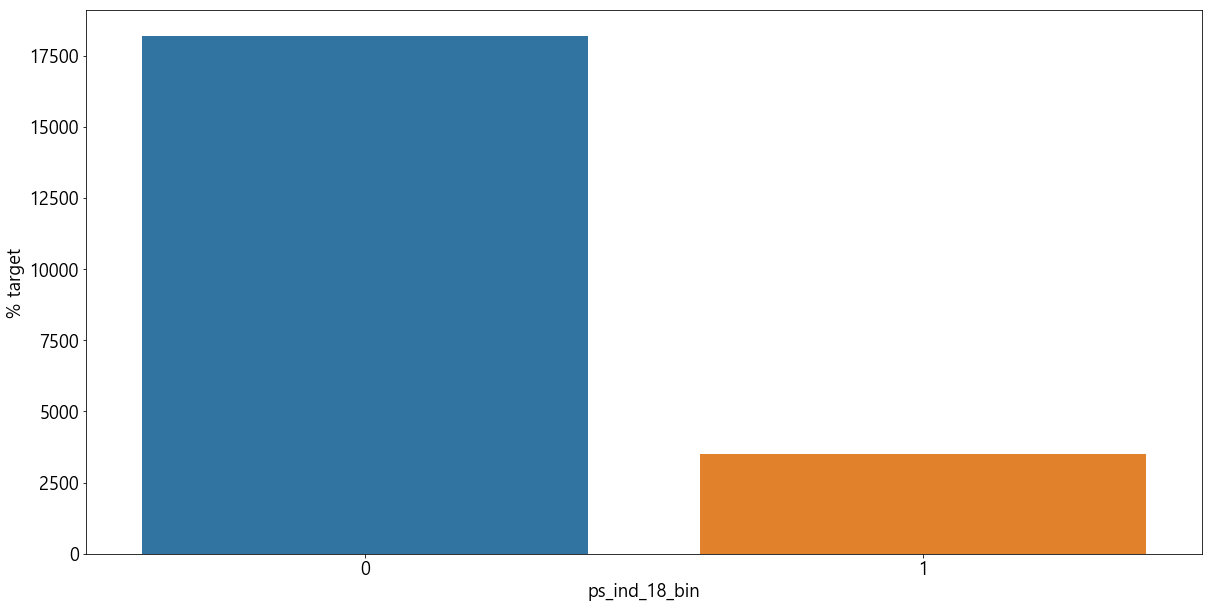

<Figure size 432x288 with 0 Axes>

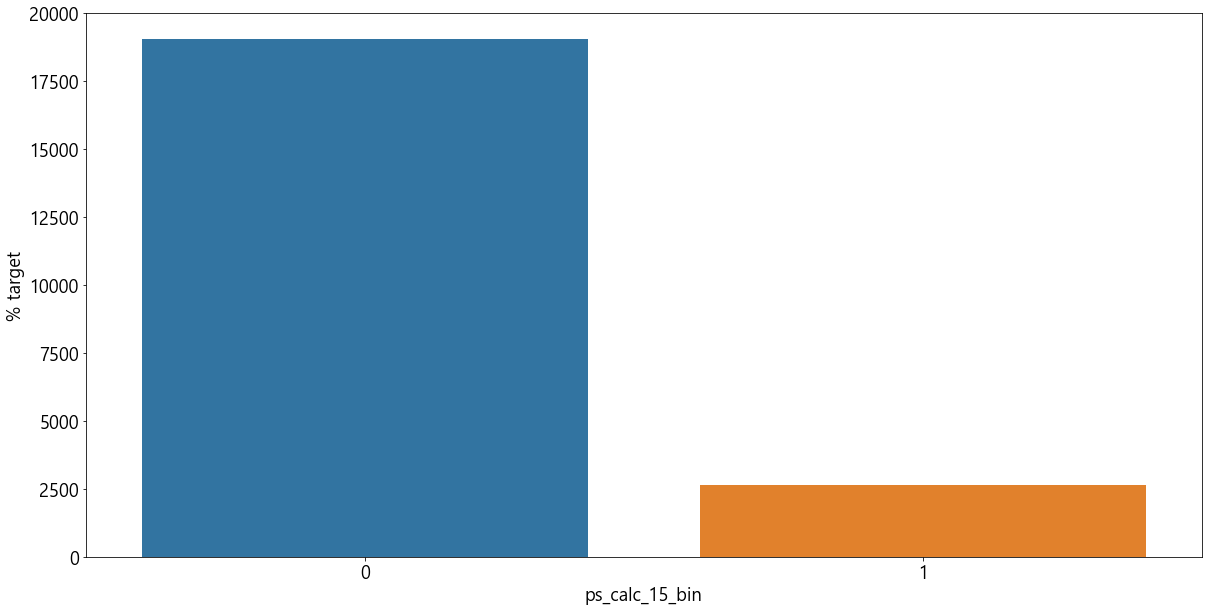

<Figure size 432x288 with 0 Axes>

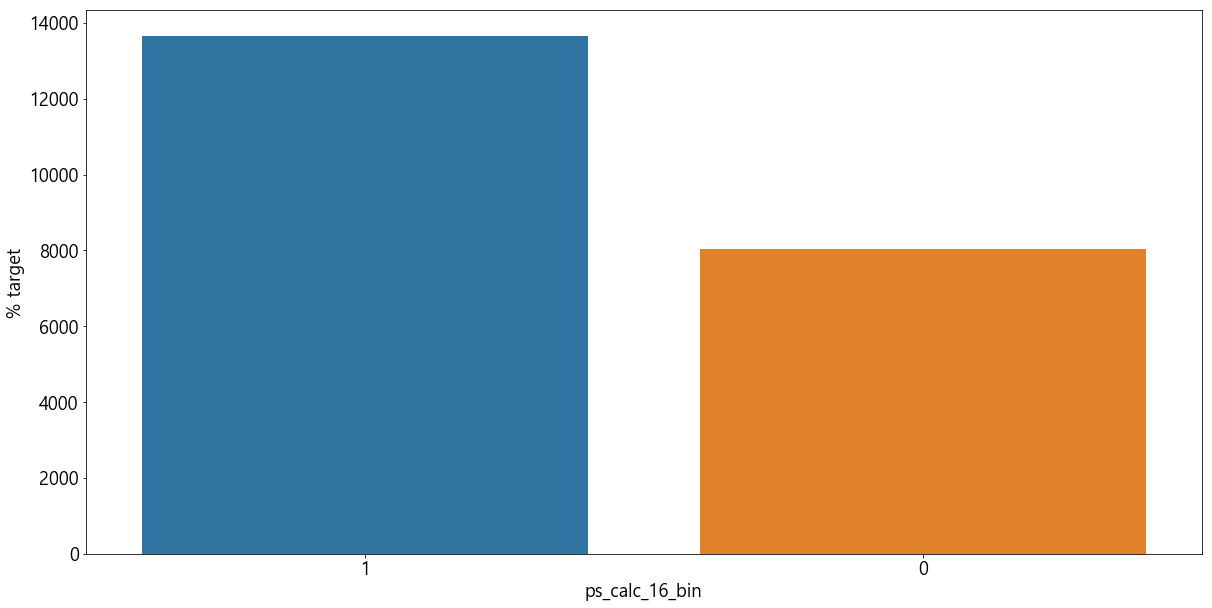

<Figure size 432x288 with 0 Axes>

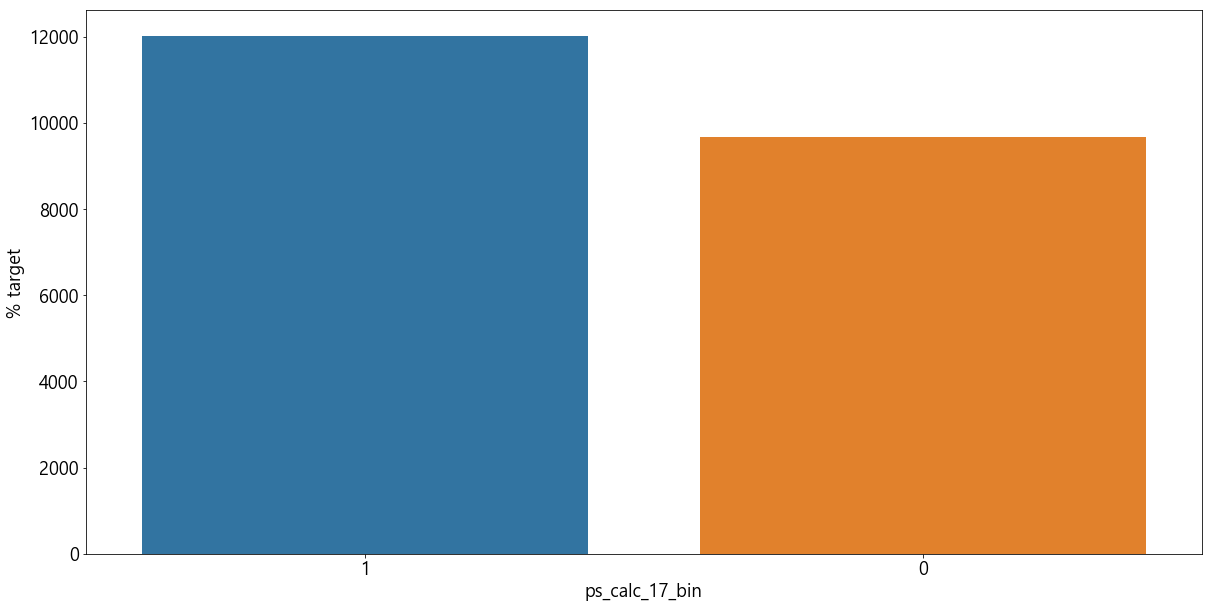

<Figure size 432x288 with 0 Axes>

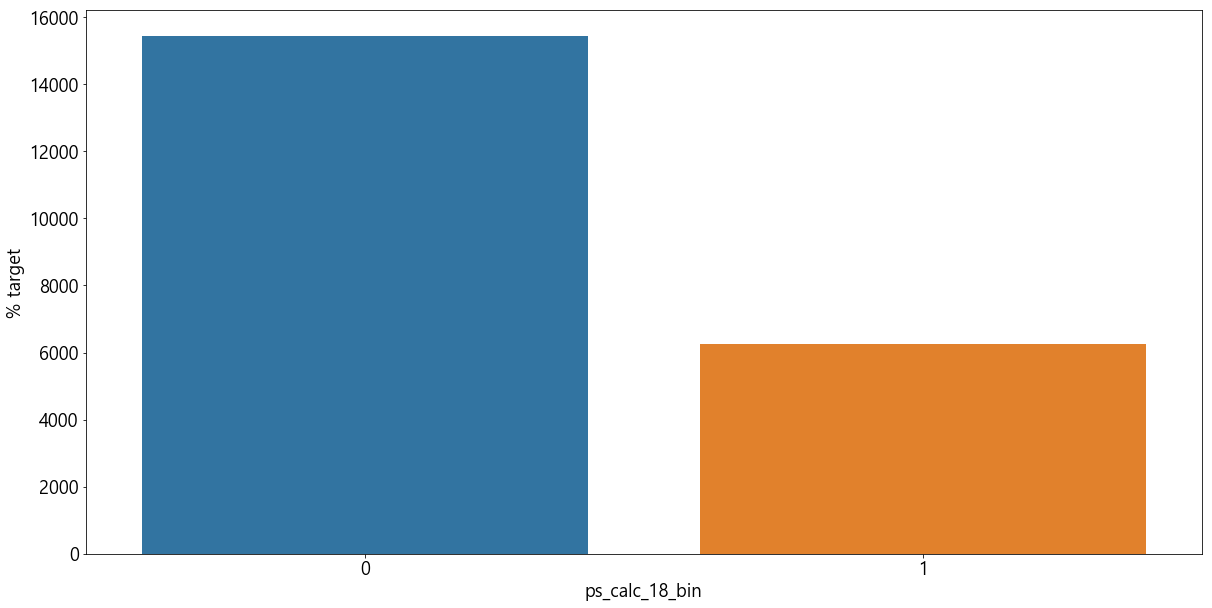

<Figure size 432x288 with 0 Axes>

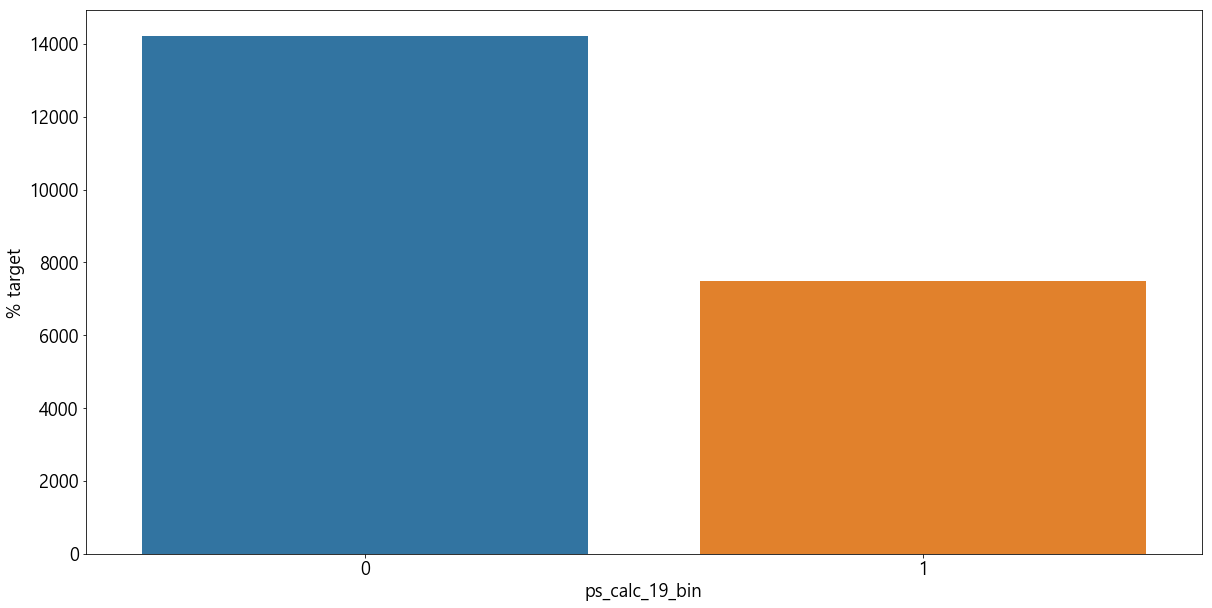

<Figure size 432x288 with 0 Axes>

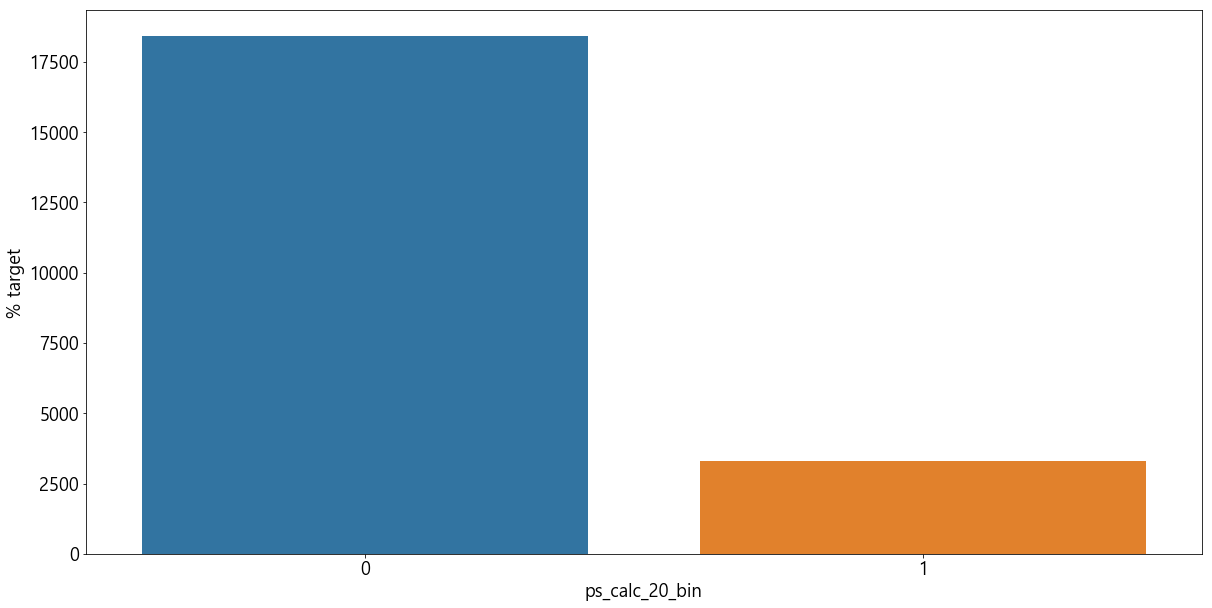

In [165]:
make_plot(datatype = 'binary', percent = False)

### Interval
`interval` 변수들 간 상관관계 확인 하기

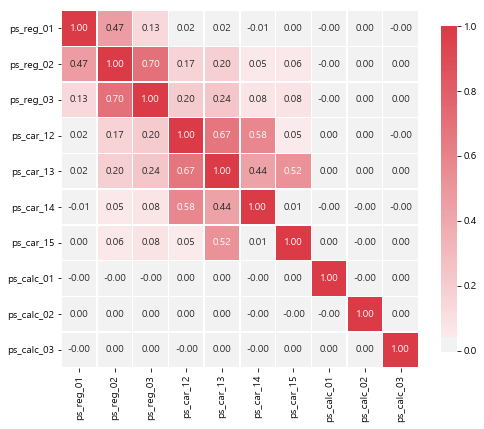

In [166]:
make_corr(datatype = 'interval')

상관관계가 0.5보다 큰 변수들이 존재합니다.

- `ps_reg_02` & `ps_reg_03` : 0.70
- `ps_car_12` & `ps_car_13` : 0.67
- `ps_car_12` & `ps_car_14` : 0.58
- `ps_car_13` & `ps_car_15` : 0.52

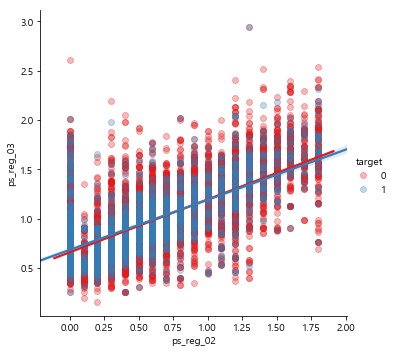

In [167]:
make_plot(datatype = 'interval', x = 'ps_reg_02', y = 'ps_reg_03')

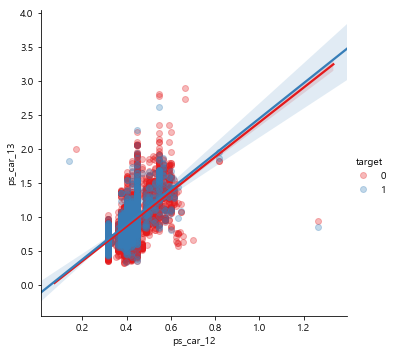

In [168]:
make_plot(datatype = 'interval', x = 'ps_car_12', y = 'ps_car_13')

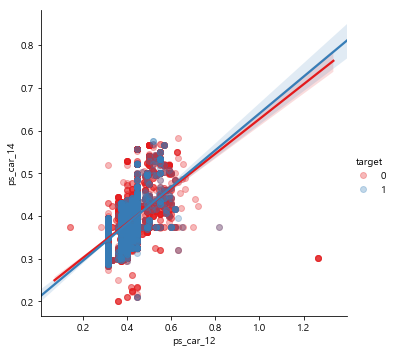

In [169]:
make_plot(datatype = 'interval', x = 'ps_car_12', y = 'ps_car_14')

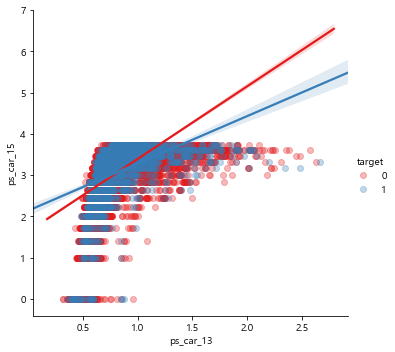

In [170]:
make_plot(datatype = 'interval', x = 'ps_car_13', y = 'ps_car_15')

### Ordinal


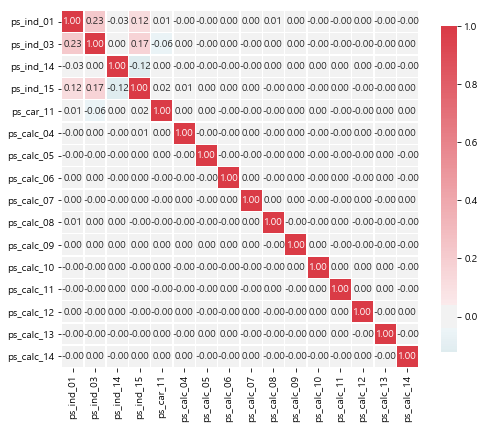

In [44]:
make_corr(datatype = 'ordinal')

`ordinal` 변수의 경우 큰 상관 관계를 보이는 변수들은 존재하지 않습니다.  

## 3. 특성 공학(Feature Engineering)

### 더미 변수 생성

In [171]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('더미 변수 전 변수 {}개'.format(train.shape[1]))
train = pd.get_dummies(train, columns = v, drop_first = True)
print('더미 변수 후 변수 {}개'.format(train.shape[1]))

더미 변수 전 변수 57개
더미 변수 후 변수 102개


### 상호작용 변수 생성

In [172]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree = 2, # 2차항 생성
                          interaction_only = False, # 상호작용만 생성 여부
                          include_bias = False) # 상수항 생성 여부
interactions = pd.DataFrame(data = poly.fit_transform(train[v]),
                            columns = poly.get_feature_names(v))
interactions.drop(v, axis = 1, inplace = True)

### 변수 선택

In [175]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin',
       'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin',
       'ps_ind_11_bin',
       ...
       'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_07_cat_1.0',
       'ps_car_08_cat_1', 'ps_car_09_cat_1.0', 'ps_car_09_cat_2.0',
       'ps_car_09_cat_3.0', 'ps_car_09_cat_4.0', 'ps_car_10_cat_1',
       'ps_car_10_cat_2'],
      dtype='object', length=102)

In [176]:
selector = VarianceThreshold(threshold = 0.01) # 1% 미만의 variance를 갖고 있는 변수 제거  
selector.fit(train.drop(['id', 'target'], axis = 1)) # id와 target값 제외하고 적합

f = np.vectorize(lambda x : not x) # 

v = train.drop(['id', 'target'], axis = 1).columns[f(selector.get_support())]

In [177]:
print('제외 된 변수 : {}개'.format(len(v)))

제외 된 변수 : 25개


In [179]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

In [180]:
feat_labels = X_train.columns

In [181]:
rf = RandomForestClassifier(n_estimators = 1000,
                            random_state = 2020,
                            n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=2020, verbose=0,
            warm_start=False)

In [182]:
imp = rf.feature_importances_
feature_imp = pd.Series(imp, index = X_train.columns)

Text(0, 0.5, 'Feature')

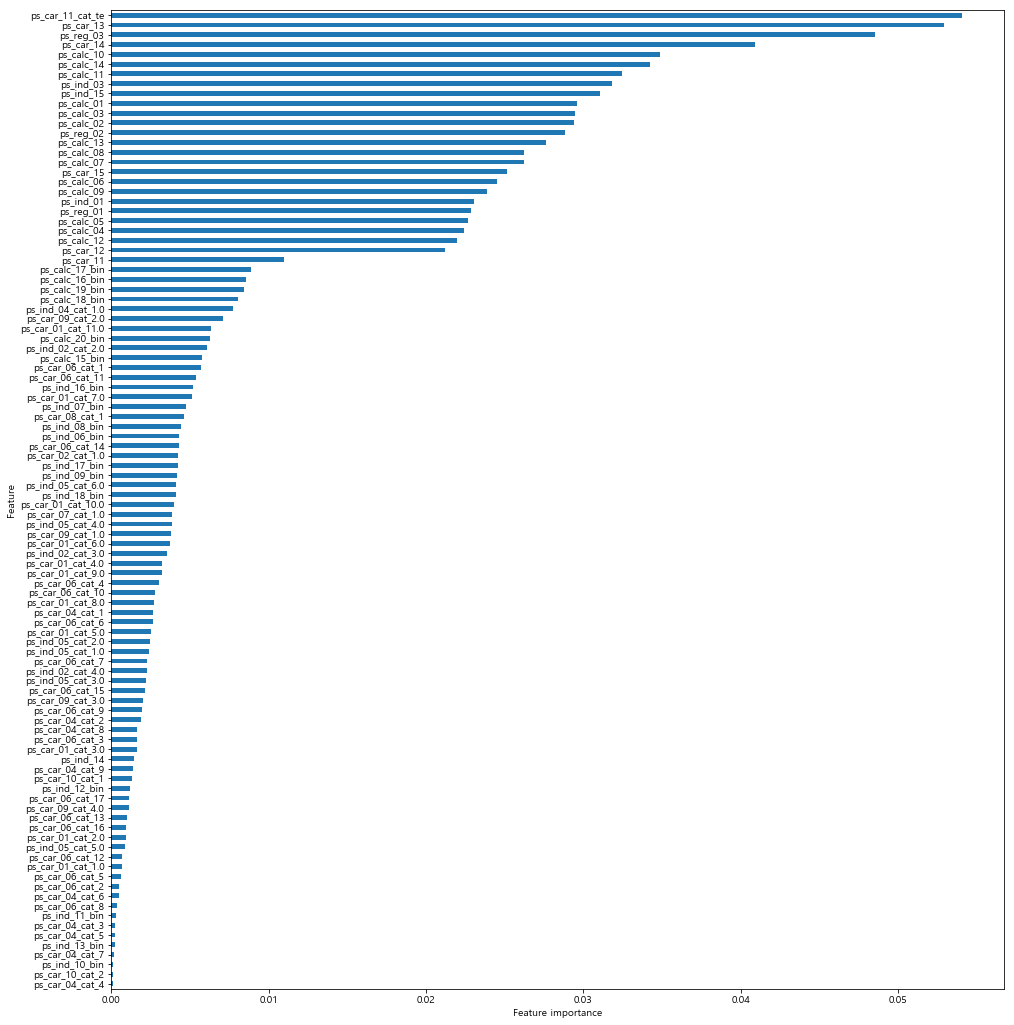

In [188]:
plt.figure(figsize = (16, 18))
feature_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')

In [190]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)
n_features = sfm.transform(X_train).shape[1]
selected_vars = list(feat_labels[sfm.get_support()])

In [191]:
print('변수의 개수 : {}'.format(X_train.shape[1]))
print('선택된 변수의 개수 : {}'.format(n_features))

변수의 개수 : 100
선택된 변수의 개수 : 50


In [192]:
train = train[selected_vars + ['target']]

### Feature Scaling

각 변수들을 표준화 하는 작업

In [193]:
scaler = StandardScaler()
scaler.fit_transform(train.drop('target', axis = 1))

array([[-0.96117056, -0.89707261,  1.25811964, ..., -0.3323508 ,
         0.45356875, -1.21363045],
       [ 0.54779453,  0.5821863 , -0.79483697, ..., -0.3323508 ,
        -2.20473745,  0.82397405],
       [ 1.55377126, -0.89707261, -0.79483697, ..., -0.3323508 ,
        -2.20473745,  0.82397405],
       ...,
       [-0.96117056,  0.5821863 , -0.79483697, ..., -0.3323508 ,
         0.45356875, -1.21363045],
       [-0.96117056, -0.89707261,  1.25811964, ..., -0.3323508 ,
        -2.20473745,  0.82397405],
       [-0.45818219, -1.26688734, -0.79483697, ..., -0.3323508 ,
         0.45356875,  0.82397405]])